# Introduction

Coronavirus disease 2019 (COVID-19), also known as the coronavirus, or COVID, is a contagious disease mainly through close contact from person to person. The virus is transmitted through direct contact with respiratory droplets of an infected person (generated through coughing and sneezing). Individuals can also be infected from and touching surfaces contaminated with the virus and touching their face (e.g., eyes, nose, mouth).

### COVID-19 Statistics <sub><sup>*(Last update: May 30, 2021)*</sup></sub>

- #### Deaths (Worldwide)
<img src="images/COVID_Deaths.png" />

- #### New Cases (Worldwide)
<img src="images/COVID_NewCases.png" />

- #### Countries
<img src="images/COVID_CountriesCases.PNG" />

- #### Iran Tests
<img src="images/COVID_Iran_Tests.PNG" />

- #### Iran Vaccinations
<img src="images/COVID_Iran_Vaccinations.PNG" />


### Purpose of this project
The hospital worldwide has been facing the urgency consequences of Covid-19 transmissions, and request for ICU beds above the usual capacity. This project is developed in order to advice the Hospital team to be prepared and obtaining accurate prediction of the future ICU admissions for confirmed COVID-19 cases. A research was developed to identify a Machine Learning model that could predict whether the patient will need the ICU or not.

### Available data
- **Patient demographic information**
- **Patient previous grouped diseases**
- **Blood results**
- **Vital signs**

Plus study variables **ICU Admission** and **Window**

<hr style="border:2px solid #ddd"></hr>

# Import libraries & some configs

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import f1_score
import shap

In [15]:
pd.set_option('display.max_columns', None)
plt.style.use('fivethirtyeight')
np.random.seed(0)

# Exploratory Data Analysis (EDA) & Feature Engineering

## Loading the data from file and removing the first unnecessary column

In [16]:
data = pd.read_excel("ICUfinal.xlsx")
data = data.iloc[: , 1:]
data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,tags,ICU
0,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## Shape and features

In [17]:
print(data.shape)
print(data.columns.to_list())

(1925, 226)
['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER', 'HTN', 'IMMUNOCOMPROMISED', 'OTHER', 'ALBUMIN_MEDIAN', 'ALBUMIN_MEAN', 'ALBUMIN_MIN', 'ALBUMIN_MAX', 'ALBUMIN_DIFF', 'BE_ARTERIAL_MEDIAN', 'BE_ARTERIAL_MEAN', 'BE_ARTERIAL_MIN', 'BE_ARTERIAL_MAX', 'BE_ARTERIAL_DIFF', 'BE_VENOUS_MEDIAN', 'BE_VENOUS_MEAN', 'BE_VENOUS_MIN', 'BE_VENOUS_MAX', 'BE_VENOUS_DIFF', 'BIC_ARTERIAL_MEDIAN', 'BIC_ARTERIAL_MEAN', 'BIC_ARTERIAL_MIN', 'BIC_ARTERIAL_MAX', 'BIC_ARTERIAL_DIFF', 'BIC_VENOUS_MEDIAN', 'BIC_VENOUS_MEAN', 'BIC_VENOUS_MIN', 'BIC_VENOUS_MAX', 'BIC_VENOUS_DIFF', 'BILLIRUBIN_MEDIAN', 'BILLIRUBIN_MEAN', 'BILLIRUBIN_MIN', 'BILLIRUBIN_MAX', 'BILLIRUBIN_DIFF', 'BLAST_MEDIAN', 'BLAST_MEAN', 'BLAST_MIN', 'BLAST_MAX', 'BLAST_DIFF', 'CALCIUM_MEDIAN', 'CALCIUM_MEAN', 'CALCIUM_MIN', 'CALCIUM_MAX', 'CALCIUM_DIFF', 'CREATININ_MEDIAN', 'CREATININ_MEAN', 'CREATININ_MIN', 'CREATININ_MAX', 'CREATININ_DIFF', 'FFA_MEDIAN', 'FFA_MEAN', 'FFA_MIN', 'FFA_MAX', 'FFA_DIFF', 'GGT_MEDIAN', '

**As you can see we have many features to deal with, but fortunately, we can ignore many of them (we will see shortly)**

## Columns type

In [18]:
data.dtypes.to_frame().T

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,tags,ICU
0,int64,int64,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float6

figuring out the columns with non numeric numbers 

In [19]:
list(set(data.columns) - set(data._get_numeric_data().columns))

['WINDOW', 'tags', 'AGE_PERCENTIL']

## Remove columns with nunique=1 (Features that have same value in all rows)

In [20]:
print(data.shape)
data.nunique(axis=0).to_frame().transpose()

(1925, 226)


,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,tags,ICU
0,385,2,10,2,2,2,2,32,32,32,32,1,56,56,56,56,1,63,63,63,63,1,26,26,26,26,1,26,26,26,26,1,95,95,95,95,1,8,8,8,8,1,48,48,48,48,1,158,158,158,158,1,119,119,119,119,1,175,175,175,175,1,82,82,82,82,1,235,235,235,235,1,117,117,117,117,1,28,28,28,28,1,147,147,147,147,1,526,526,526,526,1,272,272,272,272,1,492,492,492,492,1,75,75,75,75,1,74,74,74,74,1,34,34,34,34,1,42,42,42,42,1,483,483,483,483,1,35,35,35,35,1,40,40,40,40,1,323,323,323,323,1,39,39,39,39,1,26,26,26,26,1,77,77,77,77,1,33,33,33,33,1,100,100,100,100,1,13

In [21]:
data = data.loc[:, data.nunique(axis=0) != 1]
print(data.shape)

(1925, 190)


**So we narrowed than the features from 226 to 190**

## Some statistics about data

In [22]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821.000000,821

## Replace tags with binary columns

In [23]:
unique_tags = []
for s in data['tags'].unique():
    if isinstance(s, str):
        unique_tags += s.lower().split(", ")
unique_tags = list(set(unique_tags))
unique_tags

['motor neurone disease',
 'heart disease',
 'smoker',
 'asthma',
 'lung cancer',
 'kidney disease']

In [24]:
for tag in unique_tags:
    data[tag] = data['tags'].fillna("").str.contains(tag, case=False).astype(int)
data.loc[:, ['tags'] + unique_tags].head(10)

,tags,motor neurone disease,heart disease,smoker,asthma,lung cancer,kidney disease
0,"Motor Neurone Disease, Smoker",1,0,1,0,0,0
1,"Motor Neurone Disease, Smoker",1,0,1,0,0,0
2,"Motor Neurone Disease, Smoker",1,0,1,0,0,0
3,"Motor Neurone Disease, Smoker",1,0,1,0,0,0
4,"Motor Neurone Disease, Smoker",1,0,1,0,0,0
5,NaN,0,0,0,0,0,0
6,NaN,0,0,0,0,0,0
7,NaN,0,0,0,0,0,0
8,NaN,0,0,0,0,0,0
9,Motor Neurone Disease,1,0,0,0,0,0


In [25]:
data.drop(columns=['tags'], inplace=True)
data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,motor neurone disease,heart disease,smoker,asthma,lung cancer,kidney disease
0,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-

## Figuring out whether $X\_Median = X\_Mean = X\_Min = X\_Max$ holds or not (& Remove extra cols)

- ### get attributes that have median/mean/min/max

In [26]:
attributes = data.columns[data.columns.str.contains("MAX")].str.slice(0, -4).values
print("Len :", len(attributes))
print(attributes)

Len : 42
['ALBUMIN' 'BE_ARTERIAL' 'BE_VENOUS' 'BIC_ARTERIAL' 'BIC_VENOUS'
 'BILLIRUBIN' 'BLAST' 'CALCIUM' 'CREATININ' 'FFA' 'GGT' 'GLUCOSE'
 'HEMATOCRITE' 'HEMOGLOBIN' 'INR' 'LACTATE' 'LEUKOCYTES' 'LINFOCITOS'
 'NEUTROPHILES' 'P02_ARTERIAL' 'P02_VENOUS' 'PC02_ARTERIAL' 'PC02_VENOUS'
 'PCR' 'PH_ARTERIAL' 'PH_VENOUS' 'PLATELETS' 'POTASSIUM' 'SAT02_ARTERIAL'
 'SAT02_VENOUS' 'SODIUM' 'TGO' 'TGP' 'TTPA' 'UREA' 'DIMER'
 'BLOODPRESSURE_DIASTOLIC' 'BLOODPRESSURE_SISTOLIC' 'HEART_RATE'
 'RESPIRATORY_RATE' 'TEMPERATURE' 'OXYGEN_SATURATION']


- ### Plotting the heatmap of each attribute's mean/median/min/max to find out!

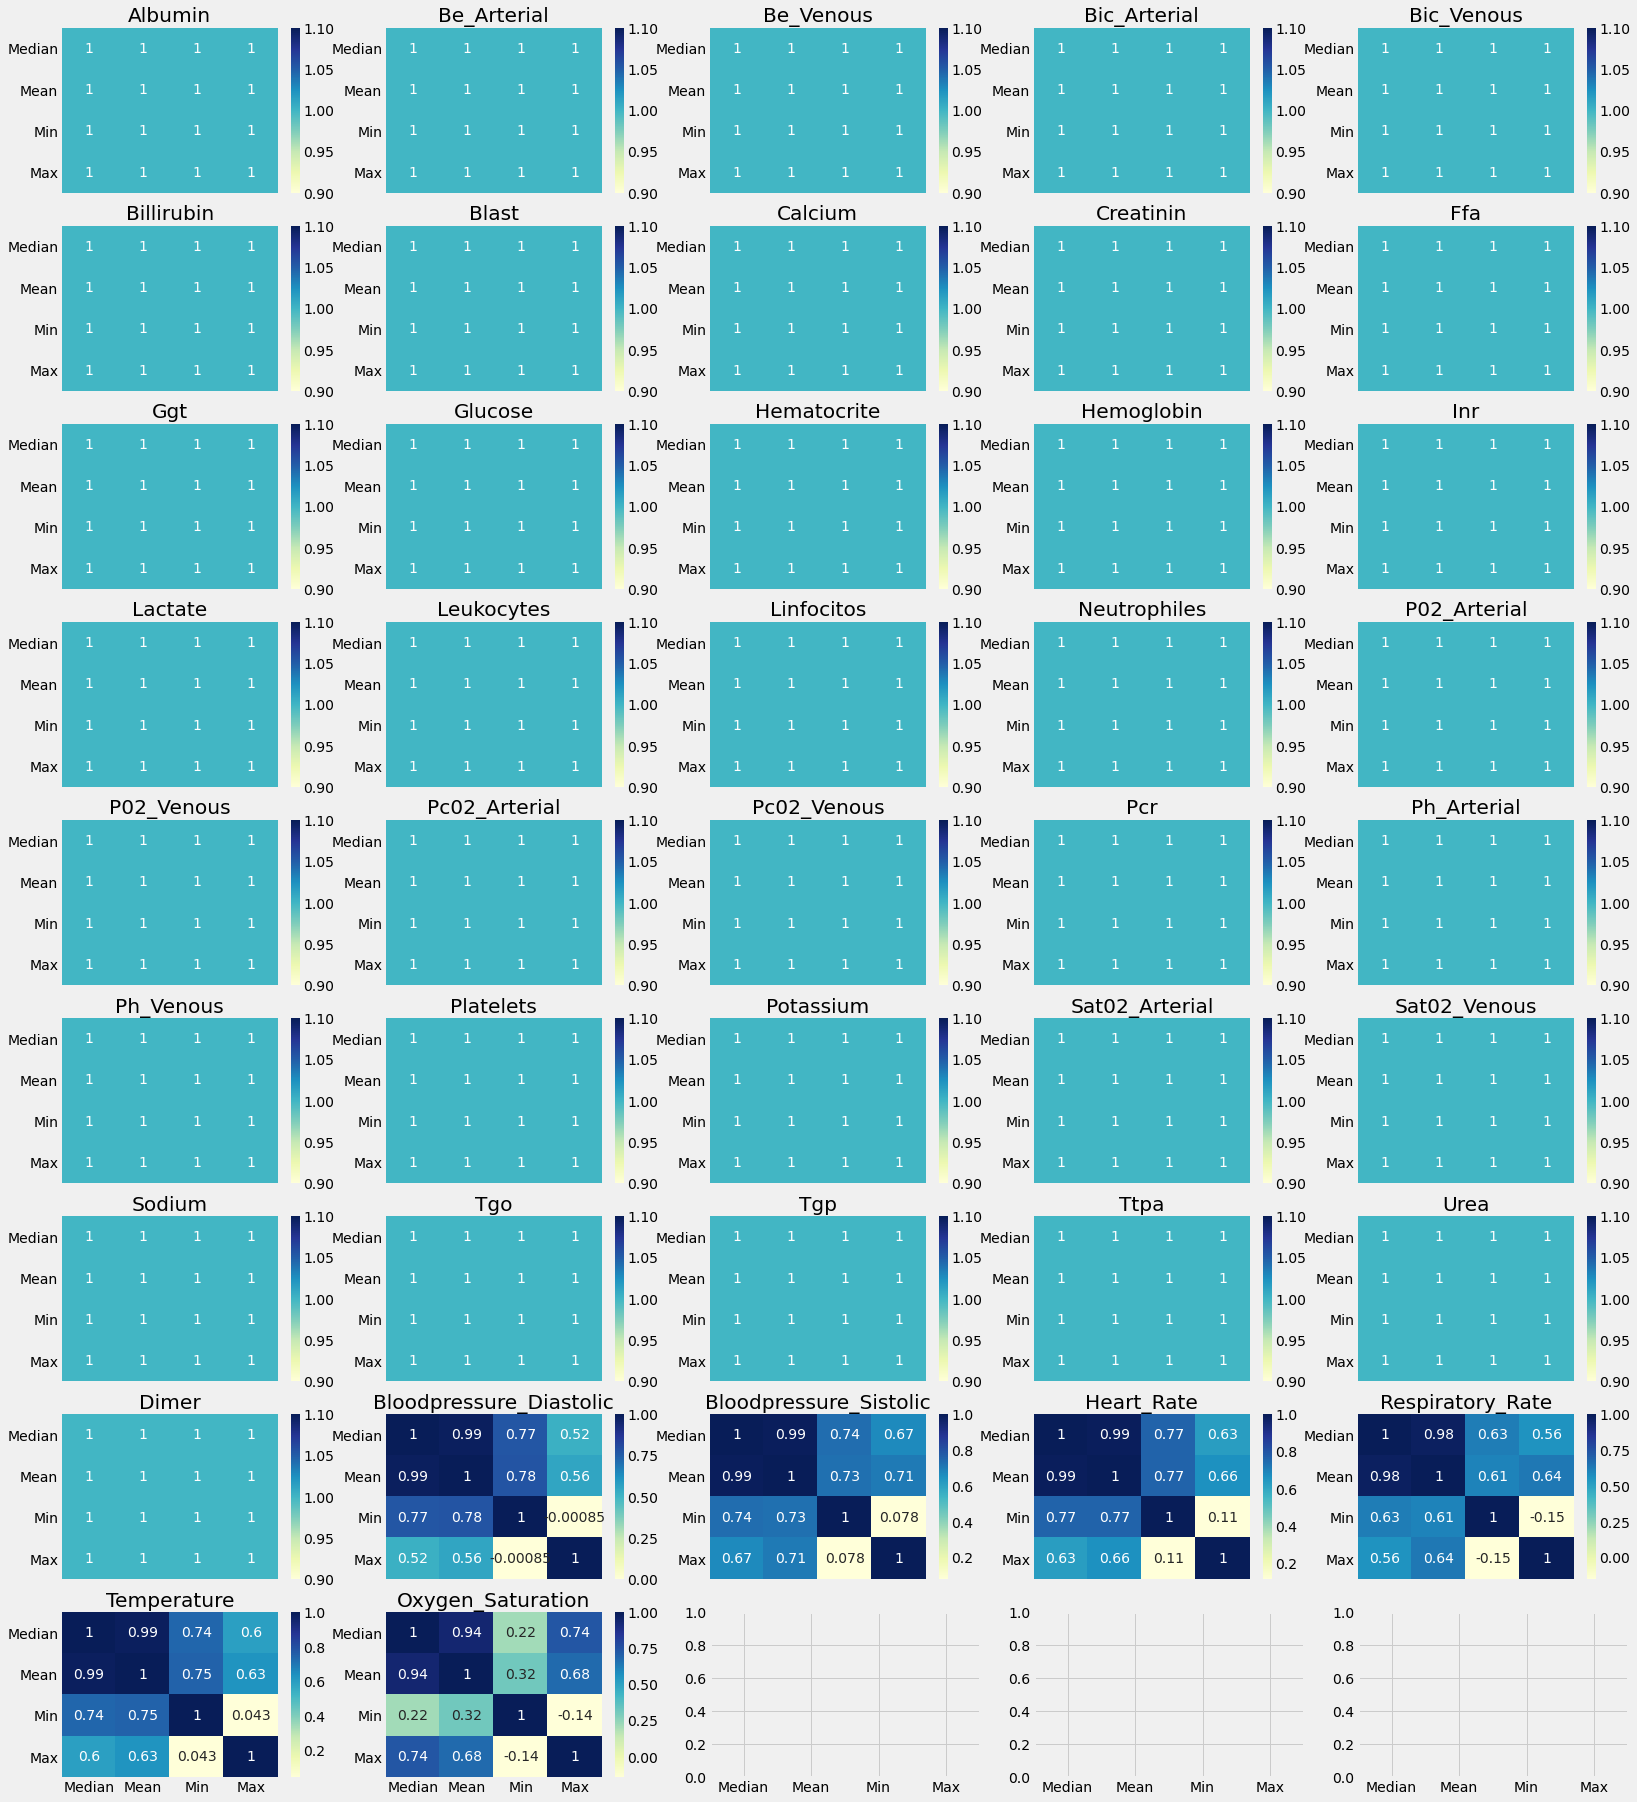

In [27]:
suffixes = ["MEDIAN", "MEAN", "MIN", "MAX"]
size_i, size_j = 9, 5
fig, axes = plt.subplots(size_i, size_j, sharex=True, figsize=(25,30))
i, j = 0, 0
for step, attr in enumerate(attributes):
    i, j = step//size_j, step%size_j
    attr_cols = ["{}_{}".format(attr, suffix) for suffix in suffixes]
    tmp_df = data[attr_cols].rename(columns={attr_cols[i]: suffixes[i].title() for i in range(4)})
    sns.heatmap(ax=axes[i, j], data=tmp_df.corr(), cmap="YlGnBu", annot=True)
    axes[i, j].set_title(attr.title())

- ### Removing extra columns

In [28]:
attributes_to_remove = attributes[:-6]
print(attributes_to_remove)

['ALBUMIN' 'BE_ARTERIAL' 'BE_VENOUS' 'BIC_ARTERIAL' 'BIC_VENOUS'
 'BILLIRUBIN' 'BLAST' 'CALCIUM' 'CREATININ' 'FFA' 'GGT' 'GLUCOSE'
 'HEMATOCRITE' 'HEMOGLOBIN' 'INR' 'LACTATE' 'LEUKOCYTES' 'LINFOCITOS'
 'NEUTROPHILES' 'P02_ARTERIAL' 'P02_VENOUS' 'PC02_ARTERIAL' 'PC02_VENOUS'
 'PCR' 'PH_ARTERIAL' 'PH_VENOUS' 'PLATELETS' 'POTASSIUM' 'SAT02_ARTERIAL'
 'SAT02_VENOUS' 'SODIUM' 'TGO' 'TGP' 'TTPA' 'UREA' 'DIMER']


In [29]:
for attr in attributes_to_remove:
    data.rename(columns={"{}_{}".format(attr, "MAX"): attr}, inplace=True)
    data.drop(columns=["{}_{}".format(attr, suff) for suff in ["MEDIAN", "MEAN", "MIN"]], inplace=True)
print(data.shape)
data.head()

(1925, 87)


,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN,BE_ARTERIAL,BE_VENOUS,BIC_ARTERIAL,BIC_VENOUS,BILLIRUBIN,BLAST,CALCIUM,CREATININ,FFA,GGT,GLUCOSE,HEMATOCRITE,HEMOGLOBIN,INR,LACTATE,LEUKOCYTES,LINFOCITOS,NEUTROPHILES,P02_ARTERIAL,P02_VENOUS,PC02_ARTERIAL,PC02_VENOUS,PCR,PH_ARTERIAL,PH_VENOUS,PLATELETS,POTASSIUM,SAT02_ARTERIAL,SAT02_VENOUS,SODIUM,TGO,TGP,TTPA,UREA,DIMER,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,motor neurone disease,heart disease,smoker,asthma,lung cancer,kidney disease
0,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0,1,0,1,0,0,0
1,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0,1,0,1,0,0,0
2,0,1,60th,0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0,1,0,1,0,0,0
3,0,1,60th,0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,-0.107143,0.736842,NaN,NaN,NaN,NaN,0.318681,0.898990,NaN,NaN,NaN,NaN,-0.275362,0.736842,NaN,NaN,NaN,NaN,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0,1,0,1,0,0,0
4,0,1,60th,0,0.0,0.0,1.0,0.000000,-0.871658,-0.863874,-0.317073,-0.414634,-0.979069,-1.0,0.326531,-0.926398,-0.859275,-0.669393,-0.891993,-0.320755,-0.353659,-0.979925,-0.963023,-0.762843,-0.643154,-0.868747,-0.365854,-0.230769,-0.875862,-0.815951,-1.000000,0.574468,0.393939,-0.471295,-0.666667,0.848485,0.925926,0.142857,-0.999067,-0.983994,-0.846633,-0.836145,-0.996762,-0.243021,-0.338537,-0.213031,-0.317859,0.033779,0.665932,-0.283951,-0.376923,-0.188679,-0.379310,0.035714,0.631579,-0.340206,-0.4875,-0.572650,-0.857143,0.098901,0.797980,-0.076923,0.286486,0.298507,0.272727,0.362319,0.947368,-0.33913,0.325153,0.114504,0.176471,-0.238095,-0.818182,-0.389

**As you can see we removed many unuseful features from our dataset**

- ### Check the correlation between these columns

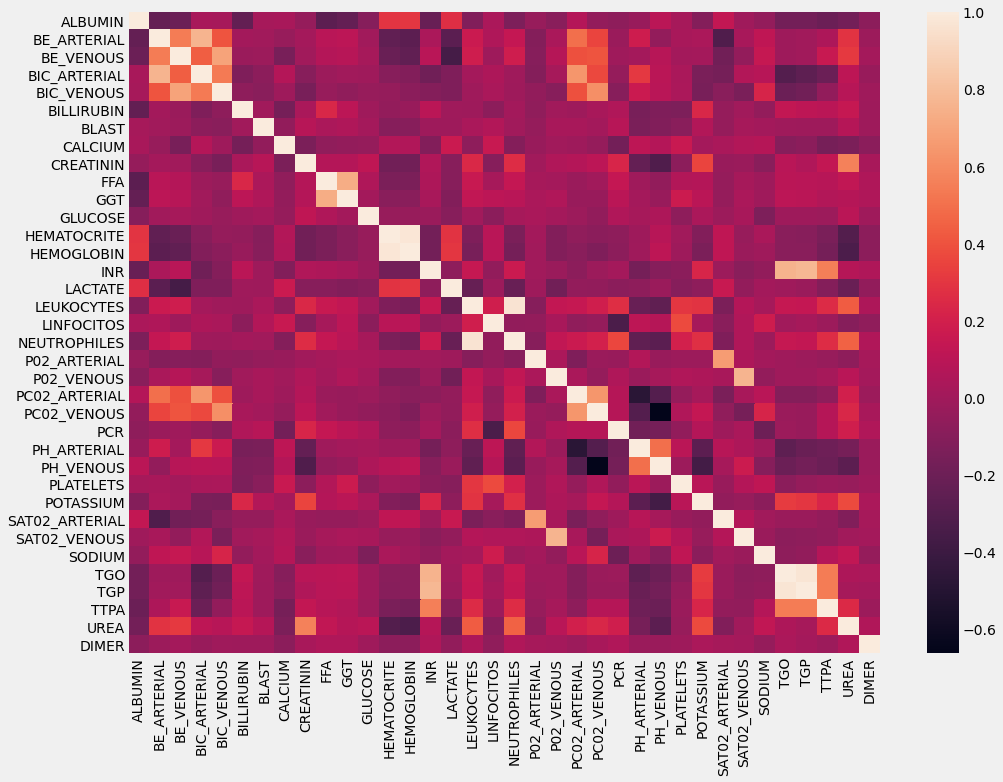

In [30]:
plt.figure(figsize=(15,11))
sns.heatmap(data[attributes_to_remove].corr());

As you can see there are some highly correlated features (~3 features). but we will skip this for now

In [31]:
corr_df = data[attributes_to_remove].corr() > 0.95
highly_correlated_features = []
threshold = 0.90
for col_i in corr_df.columns:
    for col_j in corr_df.columns:
        if col_i == col_j:
            continue
        if corr_df.loc[col_i, col_j] > threshold and (col_i, col_j) not in highly_correlated_features and (col_j, col_i) not in highly_correlated_features:
            highly_correlated_features.append((col_i, col_j))
highly_correlated_features

[('HEMATOCRITE', 'HEMOGLOBIN'), ('LEUKOCYTES', 'NEUTROPHILES'), ('TGO', 'TGP')]

## Dealing with null values

- ### Figuring out the amount of null values in each column

In [32]:
col_null_percentage = data.isna().sum() / data.shape[0]
col_null_percentage.to_frame().transpose()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN,BE_ARTERIAL,BE_VENOUS,BIC_ARTERIAL,BIC_VENOUS,BILLIRUBIN,BLAST,CALCIUM,CREATININ,FFA,GGT,GLUCOSE,HEMATOCRITE,HEMOGLOBIN,INR,LACTATE,LEUKOCYTES,LINFOCITOS,NEUTROPHILES,P02_ARTERIAL,P02_VENOUS,PC02_ARTERIAL,PC02_VENOUS,PCR,PH_ARTERIAL,PH_VENOUS,PLATELETS,POTASSIUM,SAT02_ARTERIAL,SAT02_VENOUS,SODIUM,TGO,TGP,TTPA,UREA,DIMER,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,motor neurone disease,heart disease,smoker,asthma,lung cancer,kidney disease
0,0.0,0.0,0.0,0.0,0.002597,0.002597,0.002597,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.573506,0.355844,0.355844,0.355844,0.388571,0.360519,0.356364,0.355844,0.355844,0.355844,0.388571,0.360519,0.356364,0.355844,0.355844,0.355844,0.388571,0.360519,0.356364,0.355844,0.355844,0.355844,0.388571,0.360519,0.356364,0.355844,0.355844,0.355844,0.388571,0.360519,0.356364,0.355844,0.355844,0.355844,0.388571,0.360519,0.356364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- ### Amount of null values in each row

In [33]:
(data.isna().sum(axis=1)/data.shape[1]).to_frame().T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

- ### Different Approaches toward filling these cells
    &check; Replacing them with the values of previous (or/and next) row(s) of that patient **(Better to use this here because we encounter solutions that can predict ICU admission earlier)**
    
    &cross; Replacing them with the mean of the feature for that patient **(Gives much better performance, cause it conciders the whole patient history)**
    
    &cross; Removing the whole row **(probabibly not a good idea here acording to our dataset)**
    
    &cross; etc.

I also tested the models with the second approach (Mean of the patient) and I got very high scores (F1-Score, Precision, Recall, etc.) but I realies that It was written in the description of the project that we are looking for an approach that can predict the ICU admission in earlier windows. So I changed my mind, and instead, I filled them out using previous and next rows (in other words, we concider earlier windows).

- ### Filling NaN cells with the value of previous rows or next rows of the same patient

In [34]:
data_cols = data.columns
data = pd.concat([
    data.iloc[:, 0],
    data.groupby('PATIENT_VISIT_IDENTIFIER', as_index=False)[data.iloc[:, 1:].columns].fillna(method = 'ffill').fillna(method = 'bfill')
], ignore_index=True, axis=1)
data.columns = data_cols
data.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN,BE_ARTERIAL,BE_VENOUS,BIC_ARTERIAL,BIC_VENOUS,BILLIRUBIN,BLAST,CALCIUM,CREATININ,FFA,GGT,GLUCOSE,HEMATOCRITE,HEMOGLOBIN,INR,LACTATE,LEUKOCYTES,LINFOCITOS,NEUTROPHILES,P02_ARTERIAL,P02_VENOUS,PC02_ARTERIAL,PC02_VENOUS,PCR,PH_ARTERIAL,PH_VENOUS,PLATELETS,POTASSIUM,SAT02_ARTERIAL,SAT02_VENOUS,SODIUM,TGO,TGP,TTPA,UREA,DIMER,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,motor neurone disease,heart disease,smoker,asthma,lung cancer,kidney disease
0,0,1,60th,0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0,1,0,1,0,0,0
1,0,1,60th,0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0,1,0,1,0,0,0
2,0,1,60th,0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.333333,-0.230769,-0.132075,-0.593220,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0000,-0.025641,-0.500000,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0,1,0,1,0,0,0
3,0,1,60th,0,0.0,0.0,1.0,0.605263,-1.000000,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.779310,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.333333,-0.230769,-0.132075,-0.593220,-0.107143,0.736842,0.333333,-0.230769,-0.13207

- ### Achieving Zero percent null cell in each column

In [35]:
col_null_percentage = data.isna().sum() / data.shape[0]
col_null_percentage.to_frame().transpose()
# data.dropna(inplace=True)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN,BE_ARTERIAL,BE_VENOUS,BIC_ARTERIAL,BIC_VENOUS,BILLIRUBIN,BLAST,CALCIUM,CREATININ,FFA,GGT,GLUCOSE,HEMATOCRITE,HEMOGLOBIN,INR,LACTATE,LEUKOCYTES,LINFOCITOS,NEUTROPHILES,P02_ARTERIAL,P02_VENOUS,PC02_ARTERIAL,PC02_VENOUS,PCR,PH_ARTERIAL,PH_VENOUS,PLATELETS,POTASSIUM,SAT02_ARTERIAL,SAT02_VENOUS,SODIUM,TGO,TGP,TTPA,UREA,DIMER,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU,motor neurone disease,heart disease,smoker,asthma,lung cancer,kidney disease
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Perfect :)

## First window of each patient (if wasn't in ICU at the beggining) + the ICU column (ICU admission in the future windows == 1)

We ignore patients that were in ICU at the beggining, because our task is to "Prediction", and not "Decidion". Although, the patients' information may give us some information and maybe improve our system in some situations, but, we are not going to deal with them at this moment.

- ### Remove patients which were in ICU at the beggining

In [36]:
data.shape

(1925, 87)

In [37]:
patients_to_remove = data.query('ICU == 1 and WINDOW == "0-2"')['PATIENT_VISIT_IDENTIFIER'].values
data = data[~data['PATIENT_VISIT_IDENTIFIER'].isin(patients_to_remove)]
data.shape

(1765, 87)

- ### Set patient's ICU (Acording to below rows)

In [38]:
data[data['PATIENT_VISIT_IDENTIFIER'] == 382]['ICU'].to_frame()

,ICU
1910,0
1911,0
1912,0
1913,0
1914,1


In [39]:
def patient_gp_func(rows):
    rows['ICU'] = min(1, rows['ICU'].sum())
    return rows.loc[rows['WINDOW'] == '0-2']

data = data.groupby(by="PATIENT_VISIT_IDENTIFIER", as_index=False).apply(patient_gp_func)

In [40]:
data[data['PATIENT_VISIT_IDENTIFIER'] == 382]['ICU'].to_frame()

,,ICU
350,1910,1


- ### Remove columns Patient_visit_identifier & Window & second index

In [41]:
data.drop(columns=["PATIENT_VISIT_IDENTIFIER", "WINDOW"], inplace=True)
data = data.droplevel(1)
data

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN,BE_ARTERIAL,BE_VENOUS,BIC_ARTERIAL,BIC_VENOUS,BILLIRUBIN,BLAST,CALCIUM,CREATININ,FFA,GGT,GLUCOSE,HEMATOCRITE,HEMOGLOBIN,INR,LACTATE,LEUKOCYTES,LINFOCITOS,NEUTROPHILES,P02_ARTERIAL,P02_VENOUS,PC02_ARTERIAL,PC02_VENOUS,PCR,PH_ARTERIAL,PH_VENOUS,PLATELETS,POTASSIUM,SAT02_ARTERIAL,SAT02_VENOUS,SODIUM,TGO,TGP,TTPA,UREA,DIMER,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU,motor neurone disease,heart disease,smoker,asthma,lung cancer,kidney disease
0,1,60th,0,0.0,0.0,1.0,0.605263,-1.0,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,1,0,1,0,0,0
1,0,10th,0,0.0,0.0,1.0,0.605263,-1.0,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.912243,-0.742004,-0.958528,-0.780261,0.144654,0.158537,-0.959849,1.000000,-0.382773,-0.908714,-0.412965,-0.170732,-0.704142,-0.77931,-0.754601,-0.939887,0.234043,0.363636,-0.399199,-0.703704,0.939394,0.345679,0.085714,-0.995428,-0.986662,-0.846633,-0.836145,-0.978029,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,1,0,0,0,0,0,0
2,0,40th,1,0.0,1.0,1.0,-0.263158,-1.0,-1.000000,-0.317073,-0.317073,-0.972789,-1.0,0.326531,-0.968861,-0.194030,-0.316589,-0.891993,-0.203354,-0.219512,-0.959849,-0.828421,-0.729239,-0.836100,-0.784714,-0.170732,-0.633136,-0.77931,-0.779141,-0.503592,0.234043,0.363636,-0.564753,-0.777778,0.939394,0.580247,0.200000,-0.989549,-0.956555,-0.846633,-0.937349,-0.978029,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,0,0,0,0,0
3,0,10th,0,0.0,0.0,1.0,0.605263,-1.0,-1.000000,-0.317073,-0.317073,-0.935113,-1.0,0.357143,-0.913659,-0.829424,-0.938084,-0.851024,0.358491,0.304878,-0.959849,1.000000,-0.702202,-0.641079,-0.812725,-0.170732,-0.704142,-0.77931,-0.754601,-0.990926,0.234043,0.363636,-0.457944,-0.592593,0.939394,0.345679,0.142857,-0.998507,-0.991235,-0.846633,-0.903614,-1.000000,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.333333,-0.153846,0.160377,-0.586207,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.5

## Total patients ICU admission plot

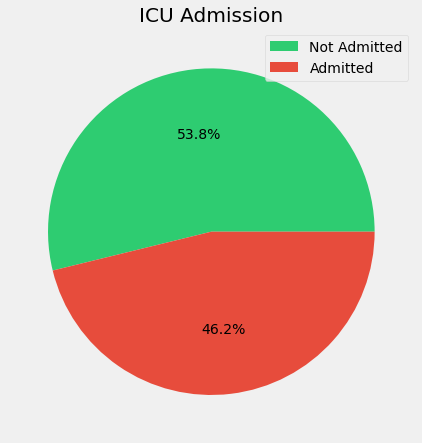

In [42]:
data['ICU'].replace([0, 1], ['Not Admitted', 'Admitted']).value_counts().plot.pie(
    colors=["#2ecc71", "#e74c3c"],
    autopct='%1.1f%%',
    figsize=(7, 7),
    title='ICU Admission',
    ylabel='',
    legend=True,
    labels=None
);

## Age Threshold 65 plot

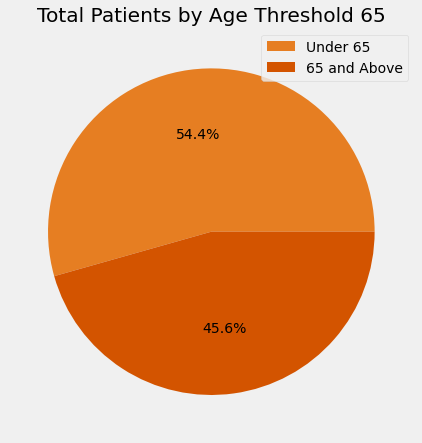

In [43]:
data['AGE_ABOVE65'].replace([0, 1], ['Under 65', '65 and Above']).value_counts().plot.pie(
    colors=["#e67e22", "#d35400"],
    autopct='%1.1f%%',
    figsize=(7, 7),
    title='Total Patients by Age Threshold 65',
    ylabel='',
    legend=True,
    labels=None
);

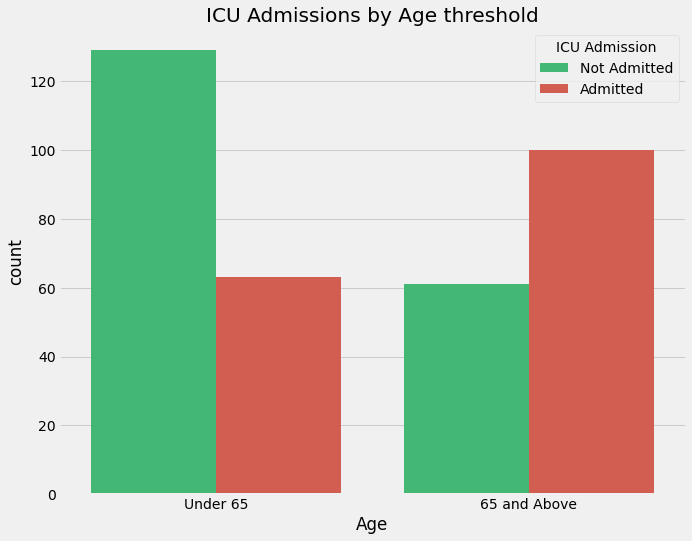

In [44]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="AGE_ABOVE65", hue='ICU', data=data, palette=["#2ecc71", "#e74c3c"])
plt.title("ICU Admissions by Age threshold")
ax.set_xticklabels(['Under 65','65 and Above'])
plt.legend(title = 'ICU Admission',labels=['Not Admitted', 'Admitted'])
plt.xlabel('Age');

## Age percentile plot

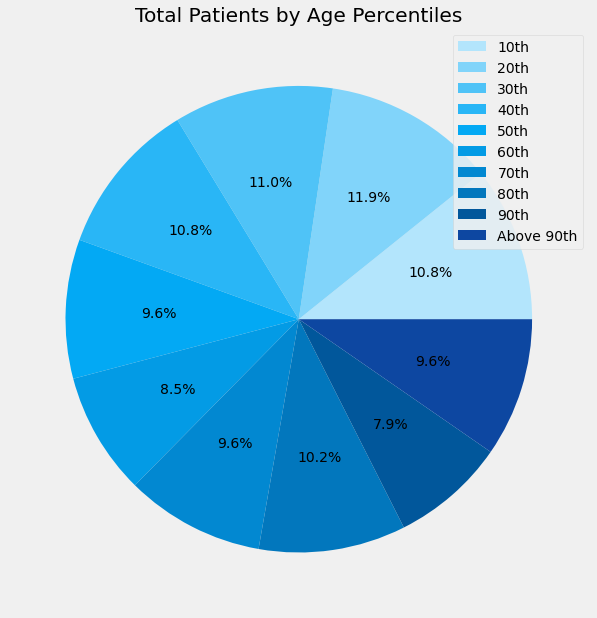

In [45]:
data['AGE_PERCENTIL'].value_counts().sort_index().plot.pie(
    colors=["#B3E5FC", "#81D4FA", "#4FC3F7", "#29B6F6", "#03A9F4", "#039BE5", '#0288D1', '#0277BD', '#01579B', '#0D47A1'],
    autopct='%1.1f%%',
    figsize=(10, 10),
    title='Total Patients by Age Percentiles',
    ylabel='',
    legend=True,
    labels=None
);

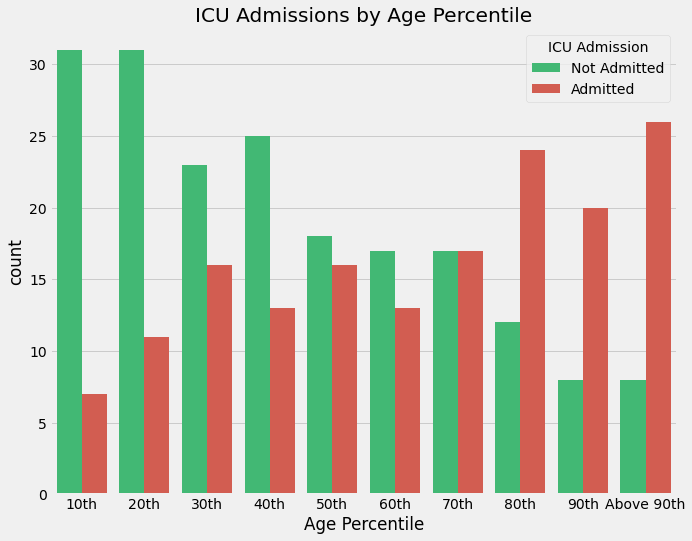

In [46]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="AGE_PERCENTIL", hue='ICU', data=data, palette=["#2ecc71", "#e74c3c"], order=['10th', '20th', '30th', '40th', '50th', '60th', '70th', '80th', '90th', 'Above 90th'])
plt.title("ICU Admissions by Age Percentile")
plt.legend(title = 'ICU Admission',labels=['Not Admitted', 'Admitted'])
plt.xlabel('Age Percentile');

**As you can see, as age goes up, the ratio of patients admitted for ICU increases.**

## Encoding of Age Percentile 

In [47]:
data['AGE_PERCENTIL'].replace(data['AGE_PERCENTIL'].sort_values().unique(), list(range(10)), inplace=True)
data

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN,BE_ARTERIAL,BE_VENOUS,BIC_ARTERIAL,BIC_VENOUS,BILLIRUBIN,BLAST,CALCIUM,CREATININ,FFA,GGT,GLUCOSE,HEMATOCRITE,HEMOGLOBIN,INR,LACTATE,LEUKOCYTES,LINFOCITOS,NEUTROPHILES,P02_ARTERIAL,P02_VENOUS,PC02_ARTERIAL,PC02_VENOUS,PCR,PH_ARTERIAL,PH_VENOUS,PLATELETS,POTASSIUM,SAT02_ARTERIAL,SAT02_VENOUS,SODIUM,TGO,TGP,TTPA,UREA,DIMER,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU,motor neurone disease,heart disease,smoker,asthma,lung cancer,kidney disease
0,1,5,0,0.0,0.0,1.0,0.605263,-1.0,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,1,0,1,0,0,0
1,0,0,0,0.0,0.0,1.0,0.605263,-1.0,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.912243,-0.742004,-0.958528,-0.780261,0.144654,0.158537,-0.959849,1.000000,-0.382773,-0.908714,-0.412965,-0.170732,-0.704142,-0.77931,-0.754601,-0.939887,0.234043,0.363636,-0.399199,-0.703704,0.939394,0.345679,0.085714,-0.995428,-0.986662,-0.846633,-0.836145,-0.978029,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,1,0,0,0,0,0,0
2,0,3,1,0.0,1.0,1.0,-0.263158,-1.0,-1.000000,-0.317073,-0.317073,-0.972789,-1.0,0.326531,-0.968861,-0.194030,-0.316589,-0.891993,-0.203354,-0.219512,-0.959849,-0.828421,-0.729239,-0.836100,-0.784714,-0.170732,-0.633136,-0.77931,-0.779141,-0.503592,0.234043,0.363636,-0.564753,-0.777778,0.939394,0.580247,0.200000,-0.989549,-0.956555,-0.846633,-0.937349,-0.978029,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,0,0,0,0,0
3,0,0,0,0.0,0.0,1.0,0.605263,-1.0,-1.000000,-0.317073,-0.317073,-0.935113,-1.0,0.357143,-0.913659,-0.829424,-0.938084,-0.851024,0.358491,0.304878,-0.959849,1.000000,-0.702202,-0.641079,-0.812725,-0.170732,-0.704142,-0.77931,-0.754601,-0.990926,0.234043,0.363636,-0.457944,-0.592593,0.939394,0.345679,0.142857,-0.998507,-0.991235,-0.846633,-0.903614,-1.000000,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.333333,-0.153846,0.160377,-0.586207,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.538462,0.9393

Besides, We have no column with non-numeric type :)

In [48]:
list(set(data.columns) - set(data._get_numeric_data().columns))

[]

## Gender plot

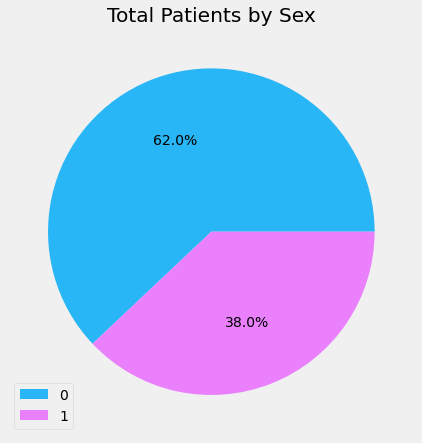

In [49]:
data['GENDER'].value_counts().plot.pie(
    colors=["#29B6F6", "#EA80FC"],
    autopct='%1.1f%%',
    figsize=(7, 7),
    title='Total Patients by Sex',
    ylabel='',
    legend=True,
    labels=None
);

**We don't know exactly which number belongs to which sex but I guess the blue area above corresponds to Sex=Max because acording to my knowledge of COVID-19, women are stronger than men against COVID.**

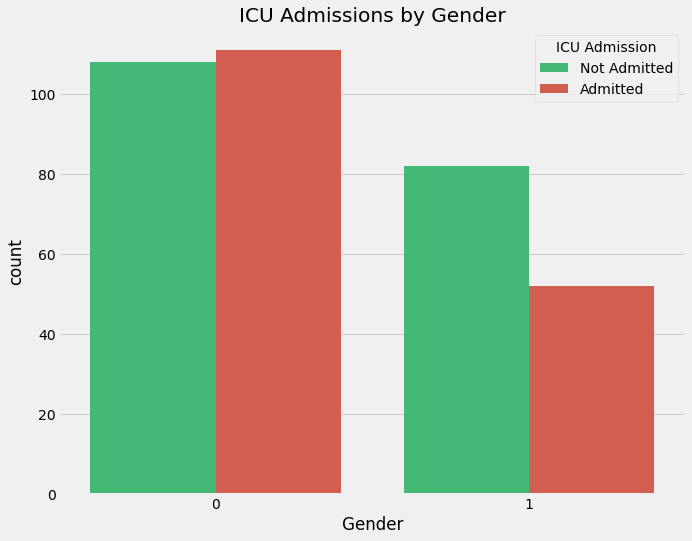

In [50]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x="GENDER", hue='ICU', data=data, palette=["#2ecc71", "#e74c3c"])
plt.title("ICU Admissions by Gender")
plt.legend(title = 'ICU Admission',labels=['Not Admitted', 'Admitted'])
plt.xlabel('Gender');

## Diseases plot

**Note: HTN stands for Hipertension**

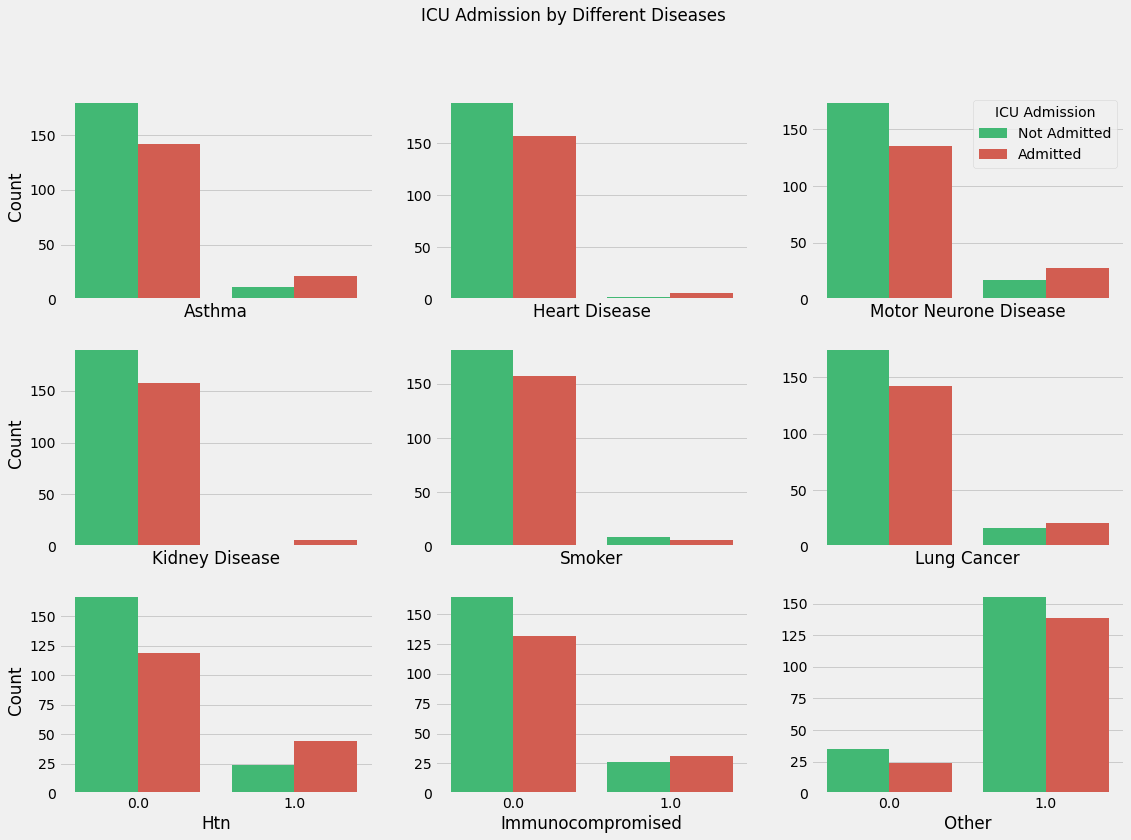

In [51]:
diseases = ['asthma', 'heart disease', 'motor neurone disease', 'kidney disease', 'smoker', 'lung cancer', 'HTN', 'IMMUNOCOMPROMISED', 'OTHER']
size_i, size_j = 3, 3
fig, axes = plt.subplots(size_i, size_j, sharex=True, figsize=(17,12))
i, j = 0, 0
for step, disease in enumerate(diseases):
    i, j = step//size_j, step%size_j
    sns.countplot(ax=axes[i, j], x=disease, hue='ICU', data=data, palette=["#2ecc71", "#e74c3c"])
    axes[i, j].get_legend().remove()
    axes[i, j].set_xlabel(disease.title());
    axes[i, j].set_ylabel(None if j != 0 else "Count")
axes[0, size_j-1].legend(title = 'ICU Admission',labels=['Not Admitted', 'Admitted'])
fig.suptitle('ICU Admission by Different Diseases');

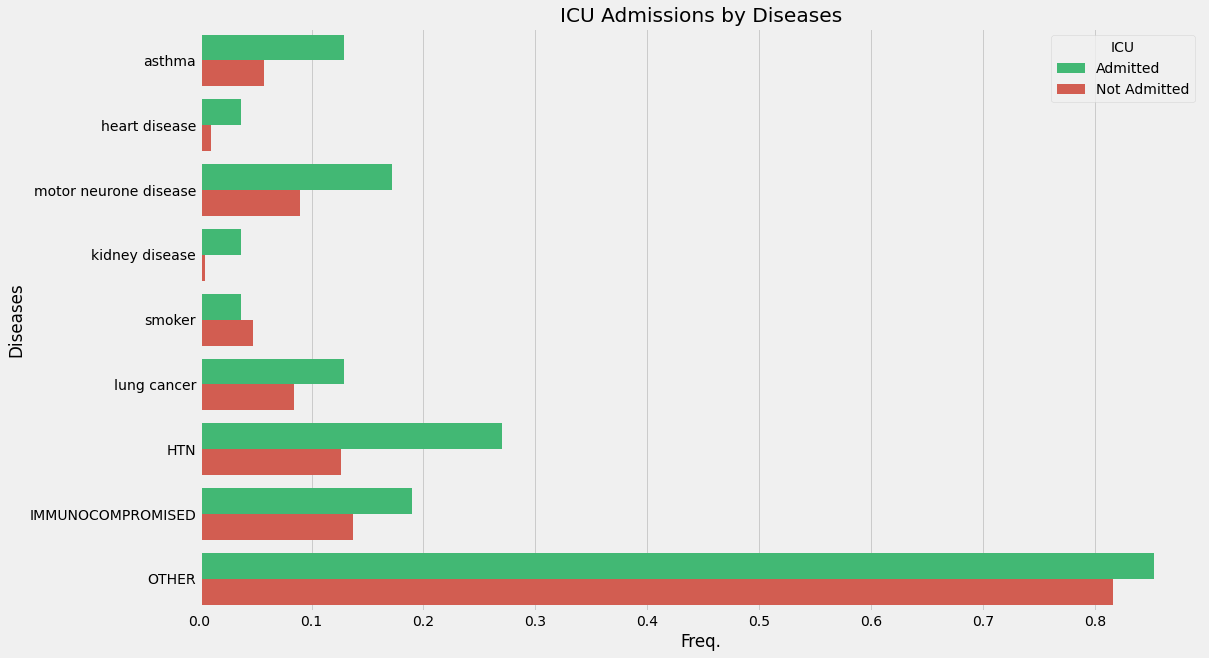

In [52]:
diseases = ['asthma', 'heart disease', 'motor neurone disease', 'kidney disease', 'smoker', 'lung cancer', 'HTN', 'IMMUNOCOMPROMISED', 'OTHER', 'ICU']
diseases_df = data.copy()[diseases]
diseases_df['ICU'] = diseases_df['ICU'].replace([0, 1], ['Not Admitted', 'Admitted'])
plt.figure(figsize=(16, 10))
sns.barplot(x='value', y='variable', data=diseases_df.melt(id_vars='ICU'), hue='ICU', ci=False, palette=["#2ecc71", "#e74c3c"])
plt.title("ICU Admissions by Diseases")
plt.ylabel('Diseases')
plt.xlabel('Freq.');

## Vital signs plot

In [53]:
data.iloc[:, 42:-6]

,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
0,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,0.086420,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0000,-0.162393,-0.500000,0.208791,0.898990,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
1,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.000000,-0.961262,1
2,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,0.012346,-0.369231,-0.528302,-0.448276,-0.285714,0.684211,0.175258,-0.1125,-0.384615,-0.357143,0.208791,0.878788,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
3,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,0.333333,-0.153846,0.160377,-0.586207,0.285714,0.868421,0.443299,0.0000,0.196581,-0.571429,0.538462,0.939394,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-1.000000,-0.883669,-0.956805,-0.870968,-0.953536,-0.980333,0
4,-0.037037,-0.538462,-0.537736,-0.525424,-0.196429,0.815789,-0.037037,-0.538462,-0.537736,-0.517241,-0.196429,0.815789,0.030928,-0.3750,-0.401709,-0.428571,0.252747,0.919192,-0.247863,-0.567568,-0.626866,-0.575758,-0.333333,0.842105,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,-0.979798,-0.860870,-0.714460,-0.986481,-1.000000,-0.975891,-0.980129,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,-0.160494,-0.692308,0.339623,-0.457627,0.142857,0.736842,-0.160494,-0.692308,0.339623,-0.448276,0.142857,0.736842,0.030928,-0.3750,0.401709,-0.357143,0.472527,0.898990,-0.418803,-0.783784,0.059701,-0.515152,-0.072464,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
349,-0.407407,-0.692308,-0.283019,-0.457627,-0.059524,0.526316,-0.407407,-0.692308,-0.283019,-0.448276,-0.250000,0.526316,-0.175258,-0.3750,-0.162393,-0.357143,0.230769,0.818182,-0.589744,-0.783784,-0.432836,-0.515152,0.072464,0.526316,-1.000000,-1.000000,-1.000000,-1.000000,-0.619048,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.612627,-1.000000,0
350,0.012346,-0.384615,-0.320755,-0.457627,-0.071429,0.894737,0.012346,-0.384615,-0.320755,-0.448276,-0.071429,0.894737,0.175258,-0.1250,-0.196581,-0.357143,0.340659,0.959596,-0.299145,-0.567568,-0.462687,-0.515152,-0.246377,0.894737,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1
351,0.086420,-0.230769,-0.301887,-0.661017,-0.107143,0.736842,0.086420,-0.230769,-0.301887,-0.655172,-0.107143,0.736842,0.237113,0.0000,-0.179487,-0.571429,0.318681,0.898990,-0.247

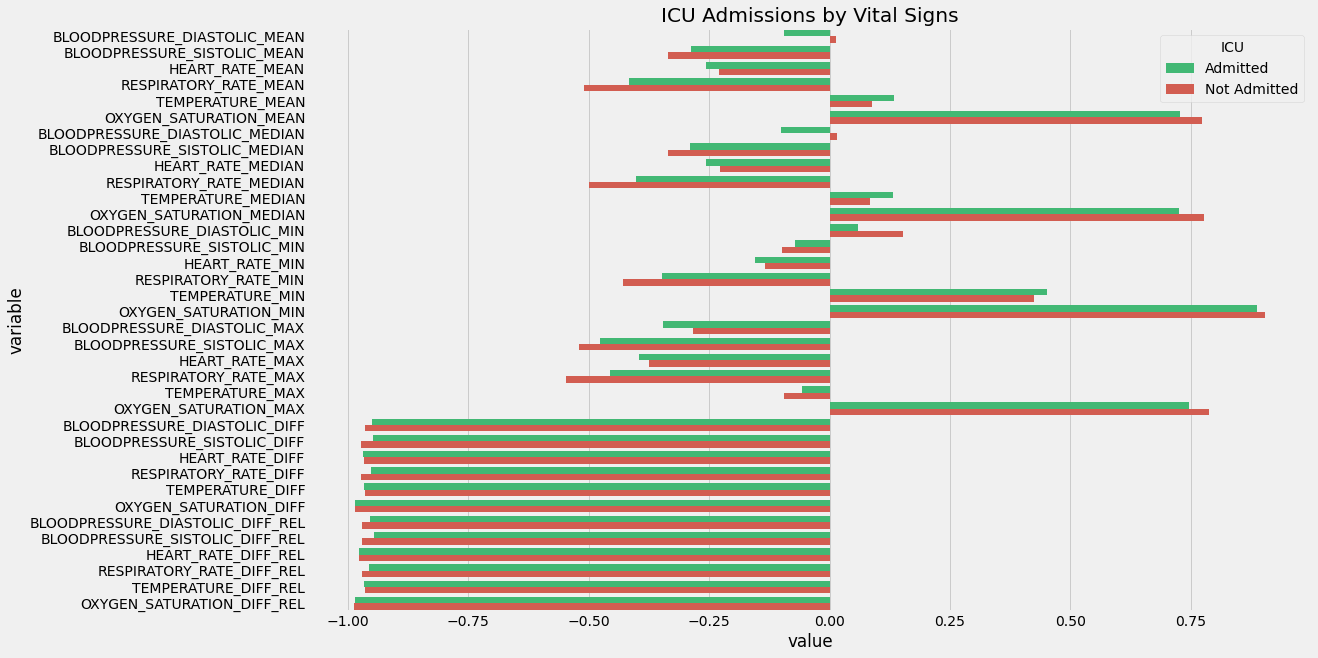

In [54]:
vital_signs_df = data.copy().iloc[:, 42:-6]
vital_signs_df['ICU'] = vital_signs_df['ICU'].replace([0, 1], ['Not Admitted', 'Admitted'])
plt.figure(figsize=(16, 10))
sns.barplot(x='value', y='variable', data=vital_signs_df.melt(id_vars='ICU'), hue='ICU', ci=False, palette=["#2ecc71", "#e74c3c"])
plt.title("ICU Admissions by Vital Signs");

## Removing Correlated Vital Signs

- ### Heatmap

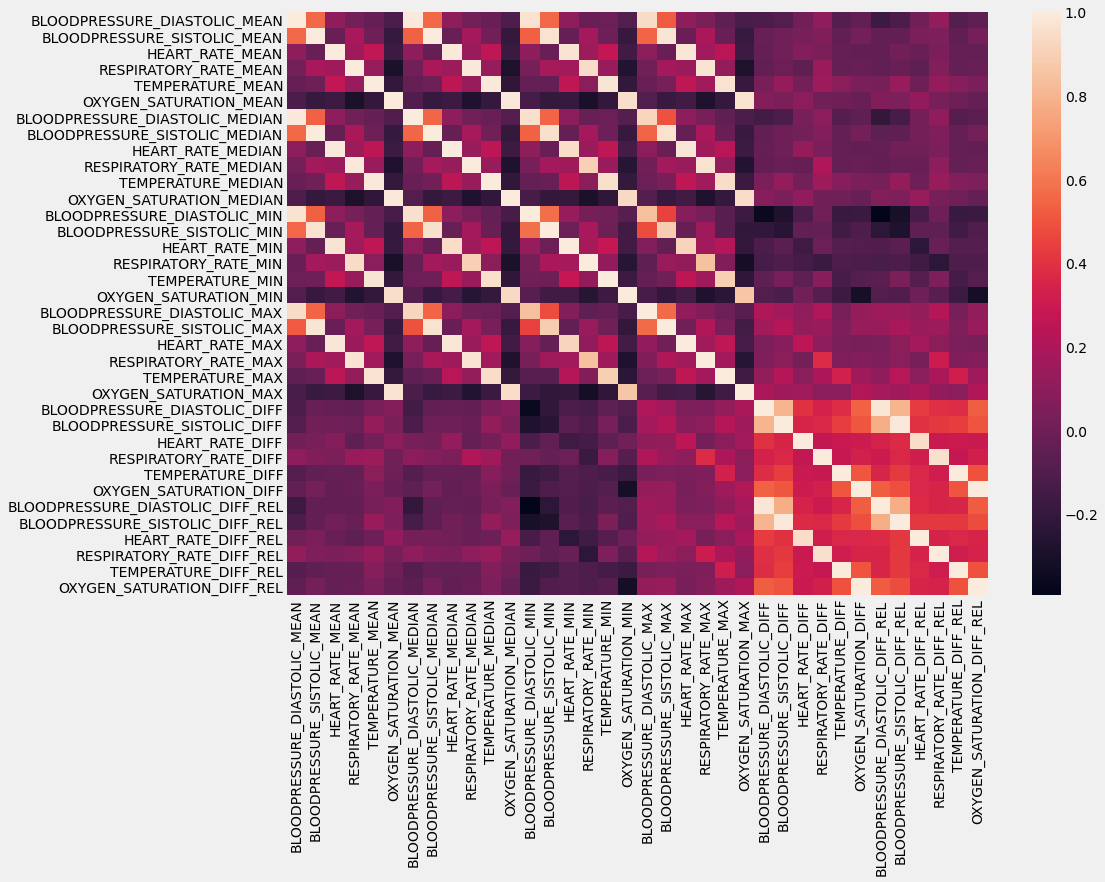

In [55]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.iloc[:, 42:-7].corr());

**We see that some columns are highly correlated, so we can omit some of them from our dataset**

- ### Remove useful columns

**Drop when $correlation >= 0.95$**

In [57]:
cols_to_remove_2 = list(set([key[0] for key, val in data.iloc[:, 42:-7].corr().unstack().sort_values(ascending=False).items() if val >= 0.95 and key[0] > key[1]]))
print(len(cols_to_remove_2))
cols_to_remove_2

21


['TEMPERATURE_MEDIAN',
 'OXYGEN_SATURATION_MEAN',
 'HEART_RATE_MEAN',
 'HEART_RATE_MIN',
 'RESPIRATORY_RATE_MEAN',
 'OXYGEN_SATURATION_MEDIAN',
 'TEMPERATURE_MIN',
 'BLOODPRESSURE_DIASTOLIC_MEDIAN',
 'TEMPERATURE_DIFF_REL',
 'BLOODPRESSURE_SISTOLIC_MEAN',
 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
 'RESPIRATORY_RATE_MEDIAN',
 'BLOODPRESSURE_SISTOLIC_MEDIAN',
 'HEART_RATE_MEDIAN',
 'OXYGEN_SATURATION_DIFF_REL',
 'BLOODPRESSURE_DIASTOLIC_MIN',
 'TEMPERATURE_MEAN',
 'BLOODPRESSURE_DIASTOLIC_DIFF_REL',
 'RESPIRATORY_RATE_DIFF_REL',
 'OXYGEN_SATURATION_MIN',
 'BLOODPRESSURE_SISTOLIC_MIN']

In [58]:
data.drop(columns=cols_to_remove_2, inplace=True)
data

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN,BE_ARTERIAL,BE_VENOUS,BIC_ARTERIAL,BIC_VENOUS,BILLIRUBIN,BLAST,CALCIUM,CREATININ,FFA,GGT,GLUCOSE,HEMATOCRITE,HEMOGLOBIN,INR,LACTATE,LEUKOCYTES,LINFOCITOS,NEUTROPHILES,P02_ARTERIAL,P02_VENOUS,PC02_ARTERIAL,PC02_VENOUS,PCR,PH_ARTERIAL,PH_VENOUS,PLATELETS,POTASSIUM,SAT02_ARTERIAL,SAT02_VENOUS,SODIUM,TGO,TGP,TTPA,UREA,DIMER,BLOODPRESSURE_DIASTOLIC_MEAN,RESPIRATORY_RATE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,ICU,motor neurone disease,heart disease,smoker,asthma,lung cancer,kidney disease
0,1,5,0,0.0,0.0,1.0,0.605263,-1.0,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.086420,-0.500000,-0.247863,-0.459459,-0.432836,-0.636364,-0.420290,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,1,0,1,0,0,0
1,0,0,0,0.0,0.0,1.0,0.605263,-1.0,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.912243,-0.742004,-0.958528,-0.780261,0.144654,0.158537,-0.959849,1.000000,-0.382773,-0.908714,-0.412965,-0.170732,-0.704142,-0.77931,-0.754601,-0.939887,0.234043,0.363636,-0.399199,-0.703704,0.939394,0.345679,0.085714,-0.995428,-0.986662,-0.846633,-0.836145,-0.978029,-0.489712,-0.714286,-0.435897,-0.491892,0.000000,-0.575758,0.101449,1.000000,-0.547826,-0.533742,-0.603053,-0.764706,-1.000000,-0.959596,-0.747001,1,0,0,0,0,0,0
2,0,3,1,0.0,1.0,1.0,-0.263158,-1.0,-1.000000,-0.317073,-0.317073,-0.972789,-1.0,0.326531,-0.968861,-0.194030,-0.316589,-0.891993,-0.203354,-0.219512,-0.959849,-0.828421,-0.729239,-0.836100,-0.784714,-0.170732,-0.633136,-0.77931,-0.779141,-0.503592,0.234043,0.363636,-0.564753,-0.777778,0.939394,0.580247,0.200000,-0.989549,-0.956555,-0.846633,-0.937349,-0.978029,0.012346,-0.357143,-0.299145,-0.556757,-0.626866,-0.515152,-0.420290,0.684211,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0,0,0,0,0,0
3,0,0,0,0.0,0.0,1.0,0.605263,-1.0,-1.000000,-0.317073,-0.317073,-0.935113,-1.0,0.357143,-0.913659,-0.829424,-0.938084,-0.851024,0.358491,0.304878,-0.959849,1.000000,-0.702202,-0.641079,-0.812725,-0.170732,-0.704142,-0.77931,-0.754601,-0.990926,0.234043,0.363636,-0.457944,-0.592593,0.939394,0.345679,0.142857,-0.998507,-0.991235,-0.846633,-0.903614,-1.000000,0.333333,-0.571429,-0.076923,-0.351351,-0.044776,-0.575758,0.072464,0.894737,-1.000000,-0.877301,-0.923664,-0.882353,-0.952381,-0.979798,-0.956805,0,0,0,0,0,0,0
4,0,0,0,0.0,0.0,1.0,0.605263,-1.0,-1.000000,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.891012,-0.742004,-0.958528,-0.891993,0.291405,0.243902,-0.959849,1.000000,-0.706450,-0.340249,-0.846339,-0.170732,-0.704142,-0.77931,-0.754601,-0.997732,0.234043,0.363636,-0.292390,-0.666667,0.939394,0.345679,0.085714,-0.997947,-0.988948,-0.846633,-0.884337,-1.000000,-0.037037,-0.428571,-0.247863,-0.567568,-0.626866,-0.575758,-0.333333,0.842105,-0.826087,-0.754601,-0.984733,-1.000000,-0.976190,-0.979798,-0.986481,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,0,3,1,0.0,1.0,1.0,-0.578947,-1.0,-1.000000,-0.317073,-0.317073,-0.293564,-1.0,0.326531,-0.937721,1.000000,-0.147196,-0.824953,-0.253669,-0.195122,-0.806775,1.000000,-0.704519,-0.879668,-0.749100,-0.170732,-0.704142,-0.77931,-0.754601,-0.565974,0.234043,0.363636,-0.895861,-0.629630,0.939394,0.345679,-0.428571,-0.925725,

- ### New Heatmap

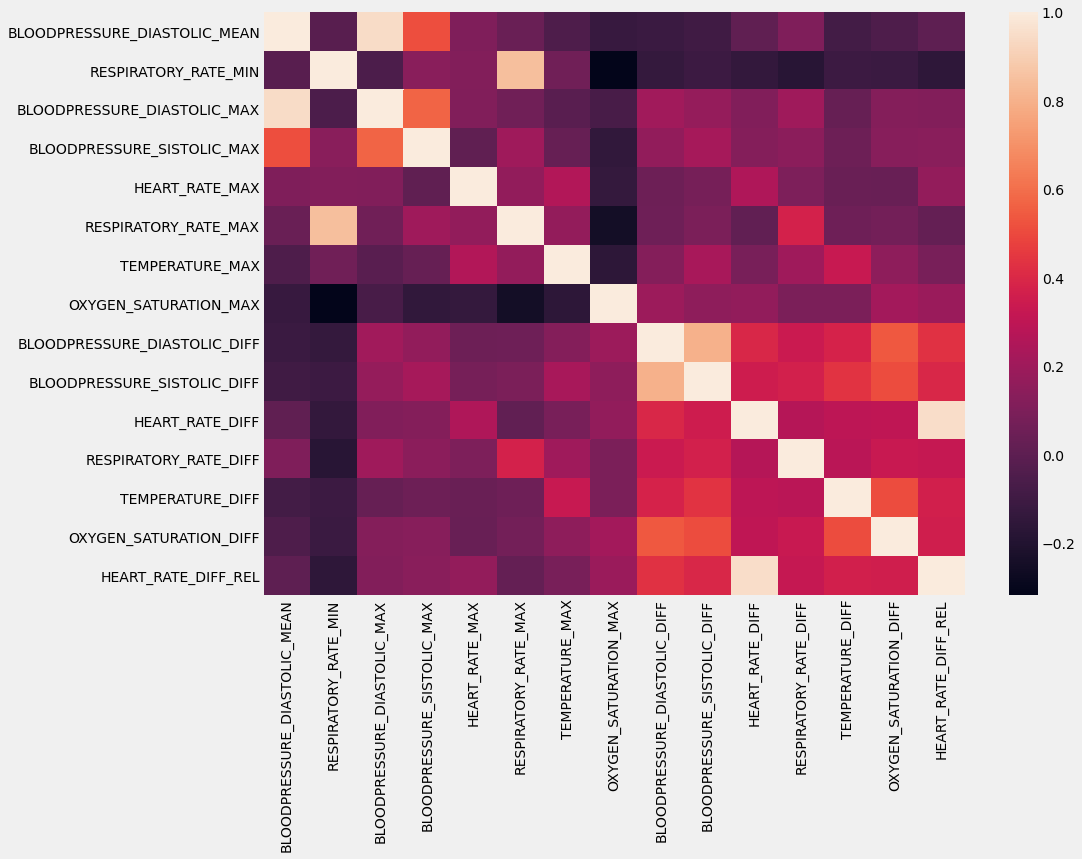

In [59]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.iloc[:, 42:-7].corr());

Still there are some features with correlation between 90 and 95. but we will just ignore them.

## Vital Signs Density Plots

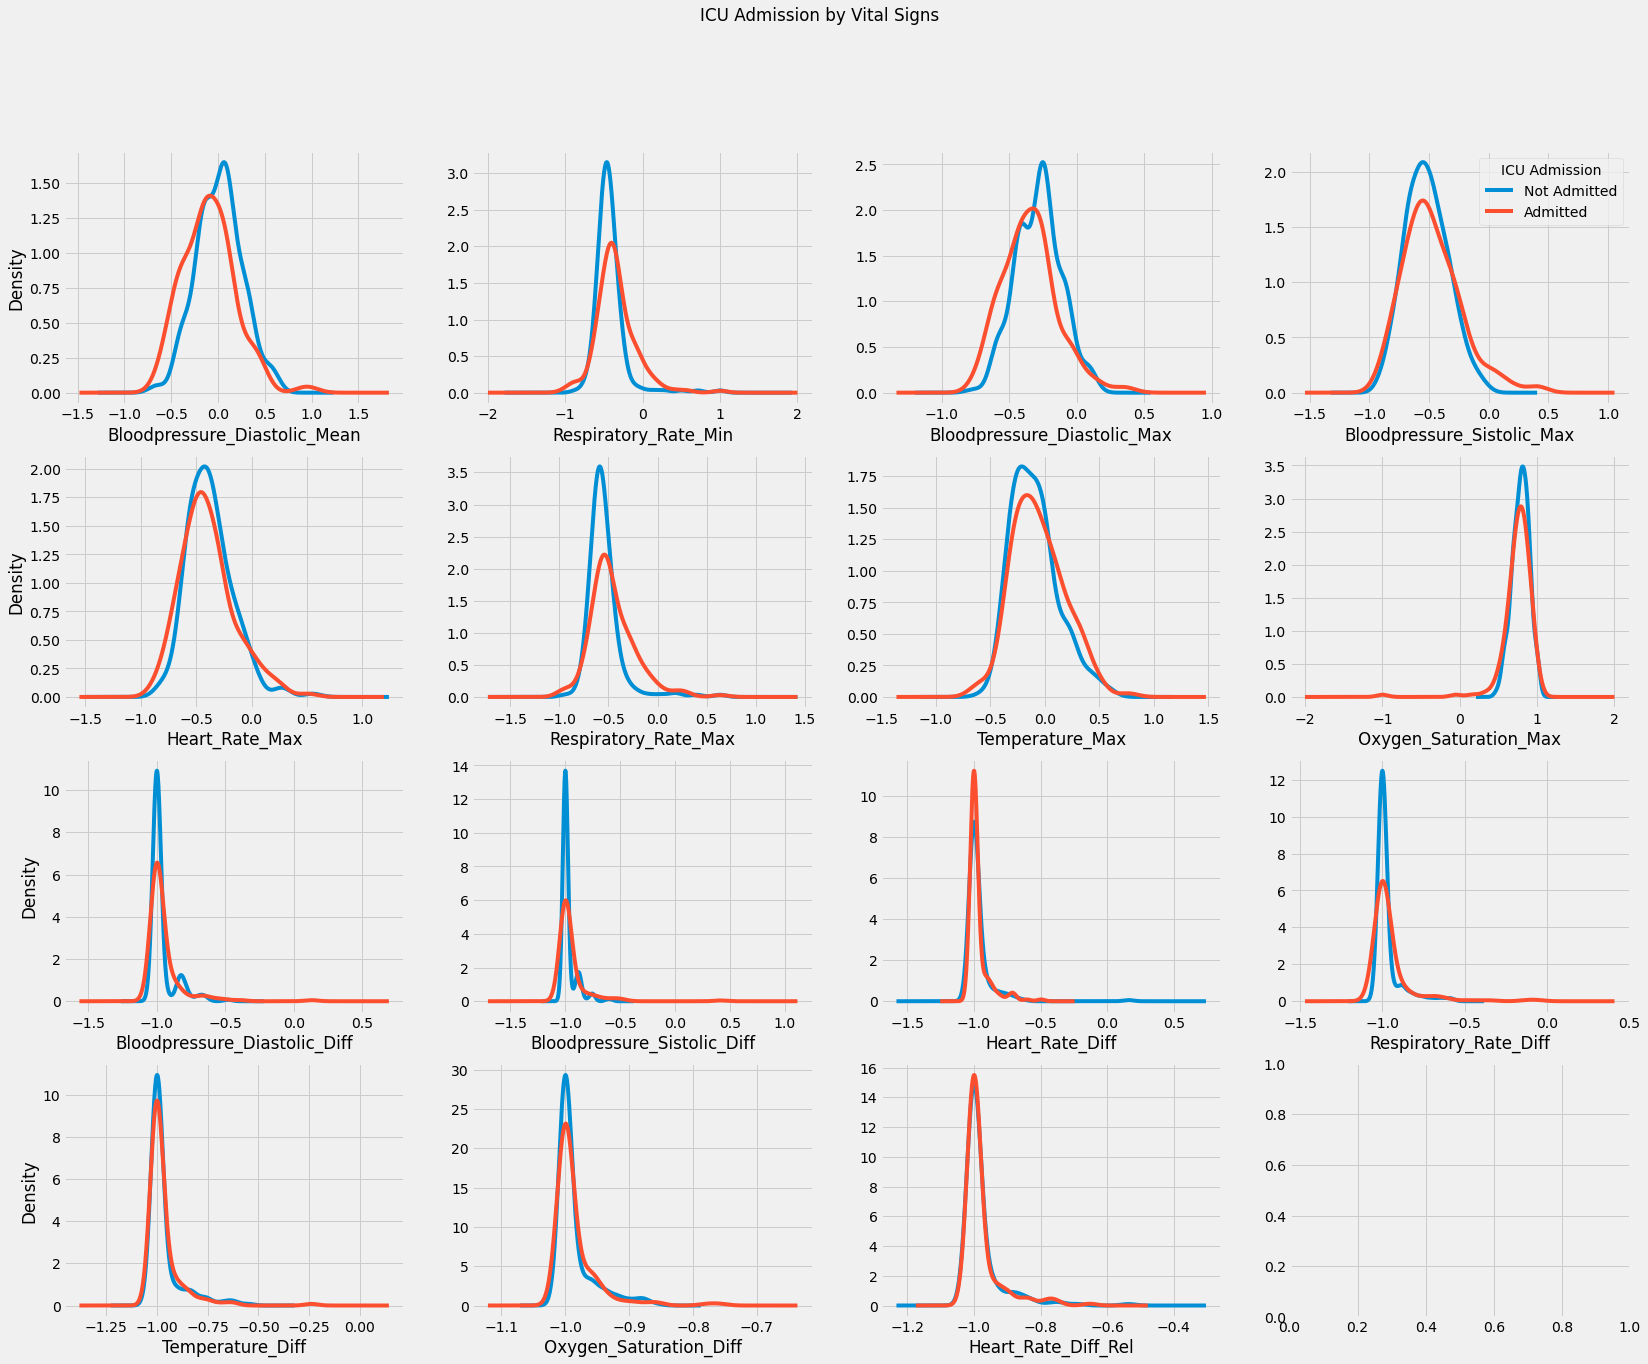

In [60]:
size_i, size_j = 4, 4
fig, axes = plt.subplots(size_i, size_j, sharex=False, figsize=(25, 20))
i, j = 0, 0
for step, col in enumerate(data.iloc[:, 42:-7].columns):
    i, j = step//size_j, step%size_j
    for k in range(2):
        data[data["ICU"] == k][col].plot.kde(ax=axes[i, j])
    axes[i, j].set_xlabel(col.title());
    axes[i, j].set_ylabel(None if j != 0 else "Density")
axes[0, size_j-1].legend(title = 'ICU Admission',labels=['Not Admitted', 'Admitted'])
fig.suptitle('ICU Admission by Vital Signs');

## Blood Results (Laboratory Exams) Plot

In [61]:
lab_exams_df = pd.concat([data.iloc[:, 6:42], data['ICU']], axis=1)
lab_exams_df.head()

,ALBUMIN,BE_ARTERIAL,BE_VENOUS,BIC_ARTERIAL,BIC_VENOUS,BILLIRUBIN,BLAST,CALCIUM,CREATININ,FFA,GGT,GLUCOSE,HEMATOCRITE,HEMOGLOBIN,INR,LACTATE,LEUKOCYTES,LINFOCITOS,NEUTROPHILES,P02_ARTERIAL,P02_VENOUS,PC02_ARTERIAL,PC02_VENOUS,PCR,PH_ARTERIAL,PH_VENOUS,PLATELETS,POTASSIUM,SAT02_ARTERIAL,SAT02_VENOUS,SODIUM,TGO,TGP,TTPA,UREA,DIMER,ICU
0,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,1
1,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.912243,-0.742004,-0.958528,-0.780261,0.144654,0.158537,-0.959849,1.000000,-0.382773,-0.908714,-0.412965,-0.170732,-0.704142,-0.77931,-0.754601,-0.939887,0.234043,0.363636,-0.399199,-0.703704,0.939394,0.345679,0.085714,-0.995428,-0.986662,-0.846633,-0.836145,-0.978029,1
2,-0.263158,-1.0,-1.0,-0.317073,-0.317073,-0.972789,-1.0,0.326531,-0.968861,-0.194030,-0.316589,-0.891993,-0.203354,-0.219512,-0.959849,-0.828421,-0.729239,-0.836100,-0.784714,-0.170732,-0.633136,-0.77931,-0.779141,-0.503592,0.234043,0.363636,-0.564753,-0.777778,0.939394,0.580247,0.200000,-0.989549,-0.956555,-0.846633,-0.937349,-0.978029,0
3,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.935113,-1.0,0.357143,-0.913659,-0.829424,-0.938084,-0.851024,0.358491,0.304878,-0.959849,1.000000,-0.702202,-0.641079,-0.812725,-0.170732,-0.704142,-0.77931,-0.754601,-0.990926,0.234043,0.363636,-0.457944,-0.592593,0.939394,0.345679,0.142857,-0.998507,-0.991235,-0.846633,-0.903614,-1.000000,0
4,0.605263,-1.0,-1.0,-0.317073,-0.317073,-0.938950,-1.0,0.357143,-0.891012,-0.742004,-0.958528,-0.891993,0.291405,0.243902,-0.959849,1.000000,-0.706450,-0.340249,-0.846339,-0.170732,-0.704142,-0.77931,-0.754601,-0.997732,0.234043,0.363636,-0.292390,-0.666667,0.939394,0.345679,0.085714,-0.997947,-0.988948,-0.846633,-0.884337,-1.000000,0


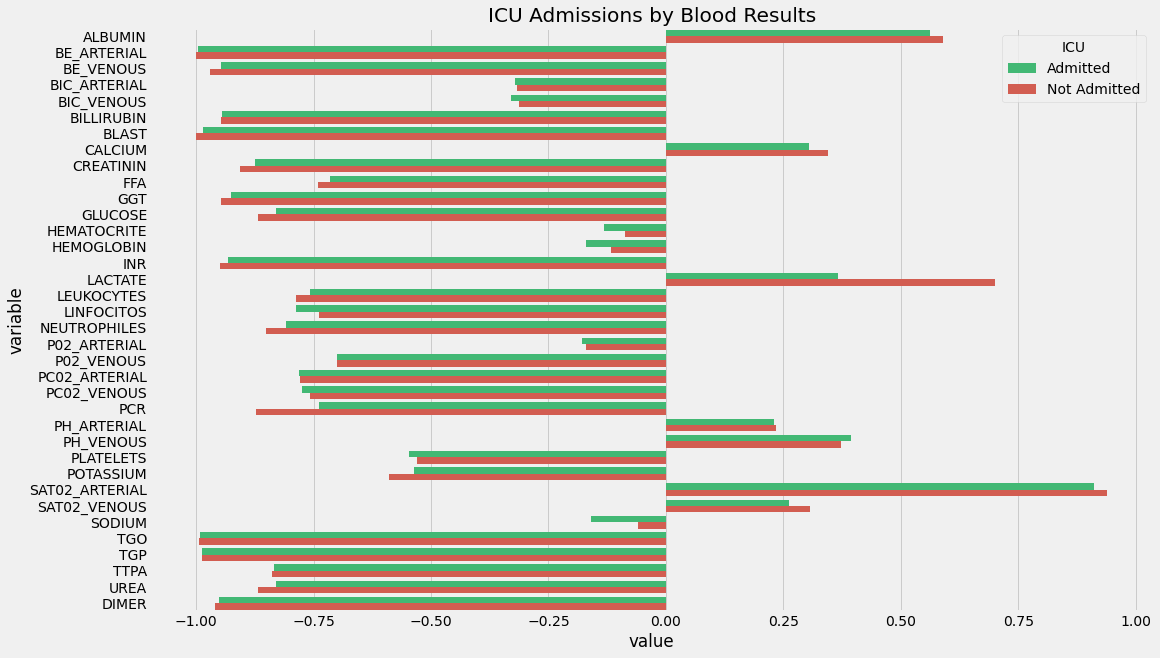

In [62]:
lab_exams_df['ICU'] = lab_exams_df['ICU'].replace([0, 1], ['Not Admitted', 'Admitted'])
plt.figure(figsize=(16, 10))
sns.barplot(x='value', y='variable', data=lab_exams_df.melt(id_vars='ICU'), hue='ICU', ci=False, palette=["#2ecc71", "#e74c3c"])
plt.title("ICU Admissions by Blood Results");

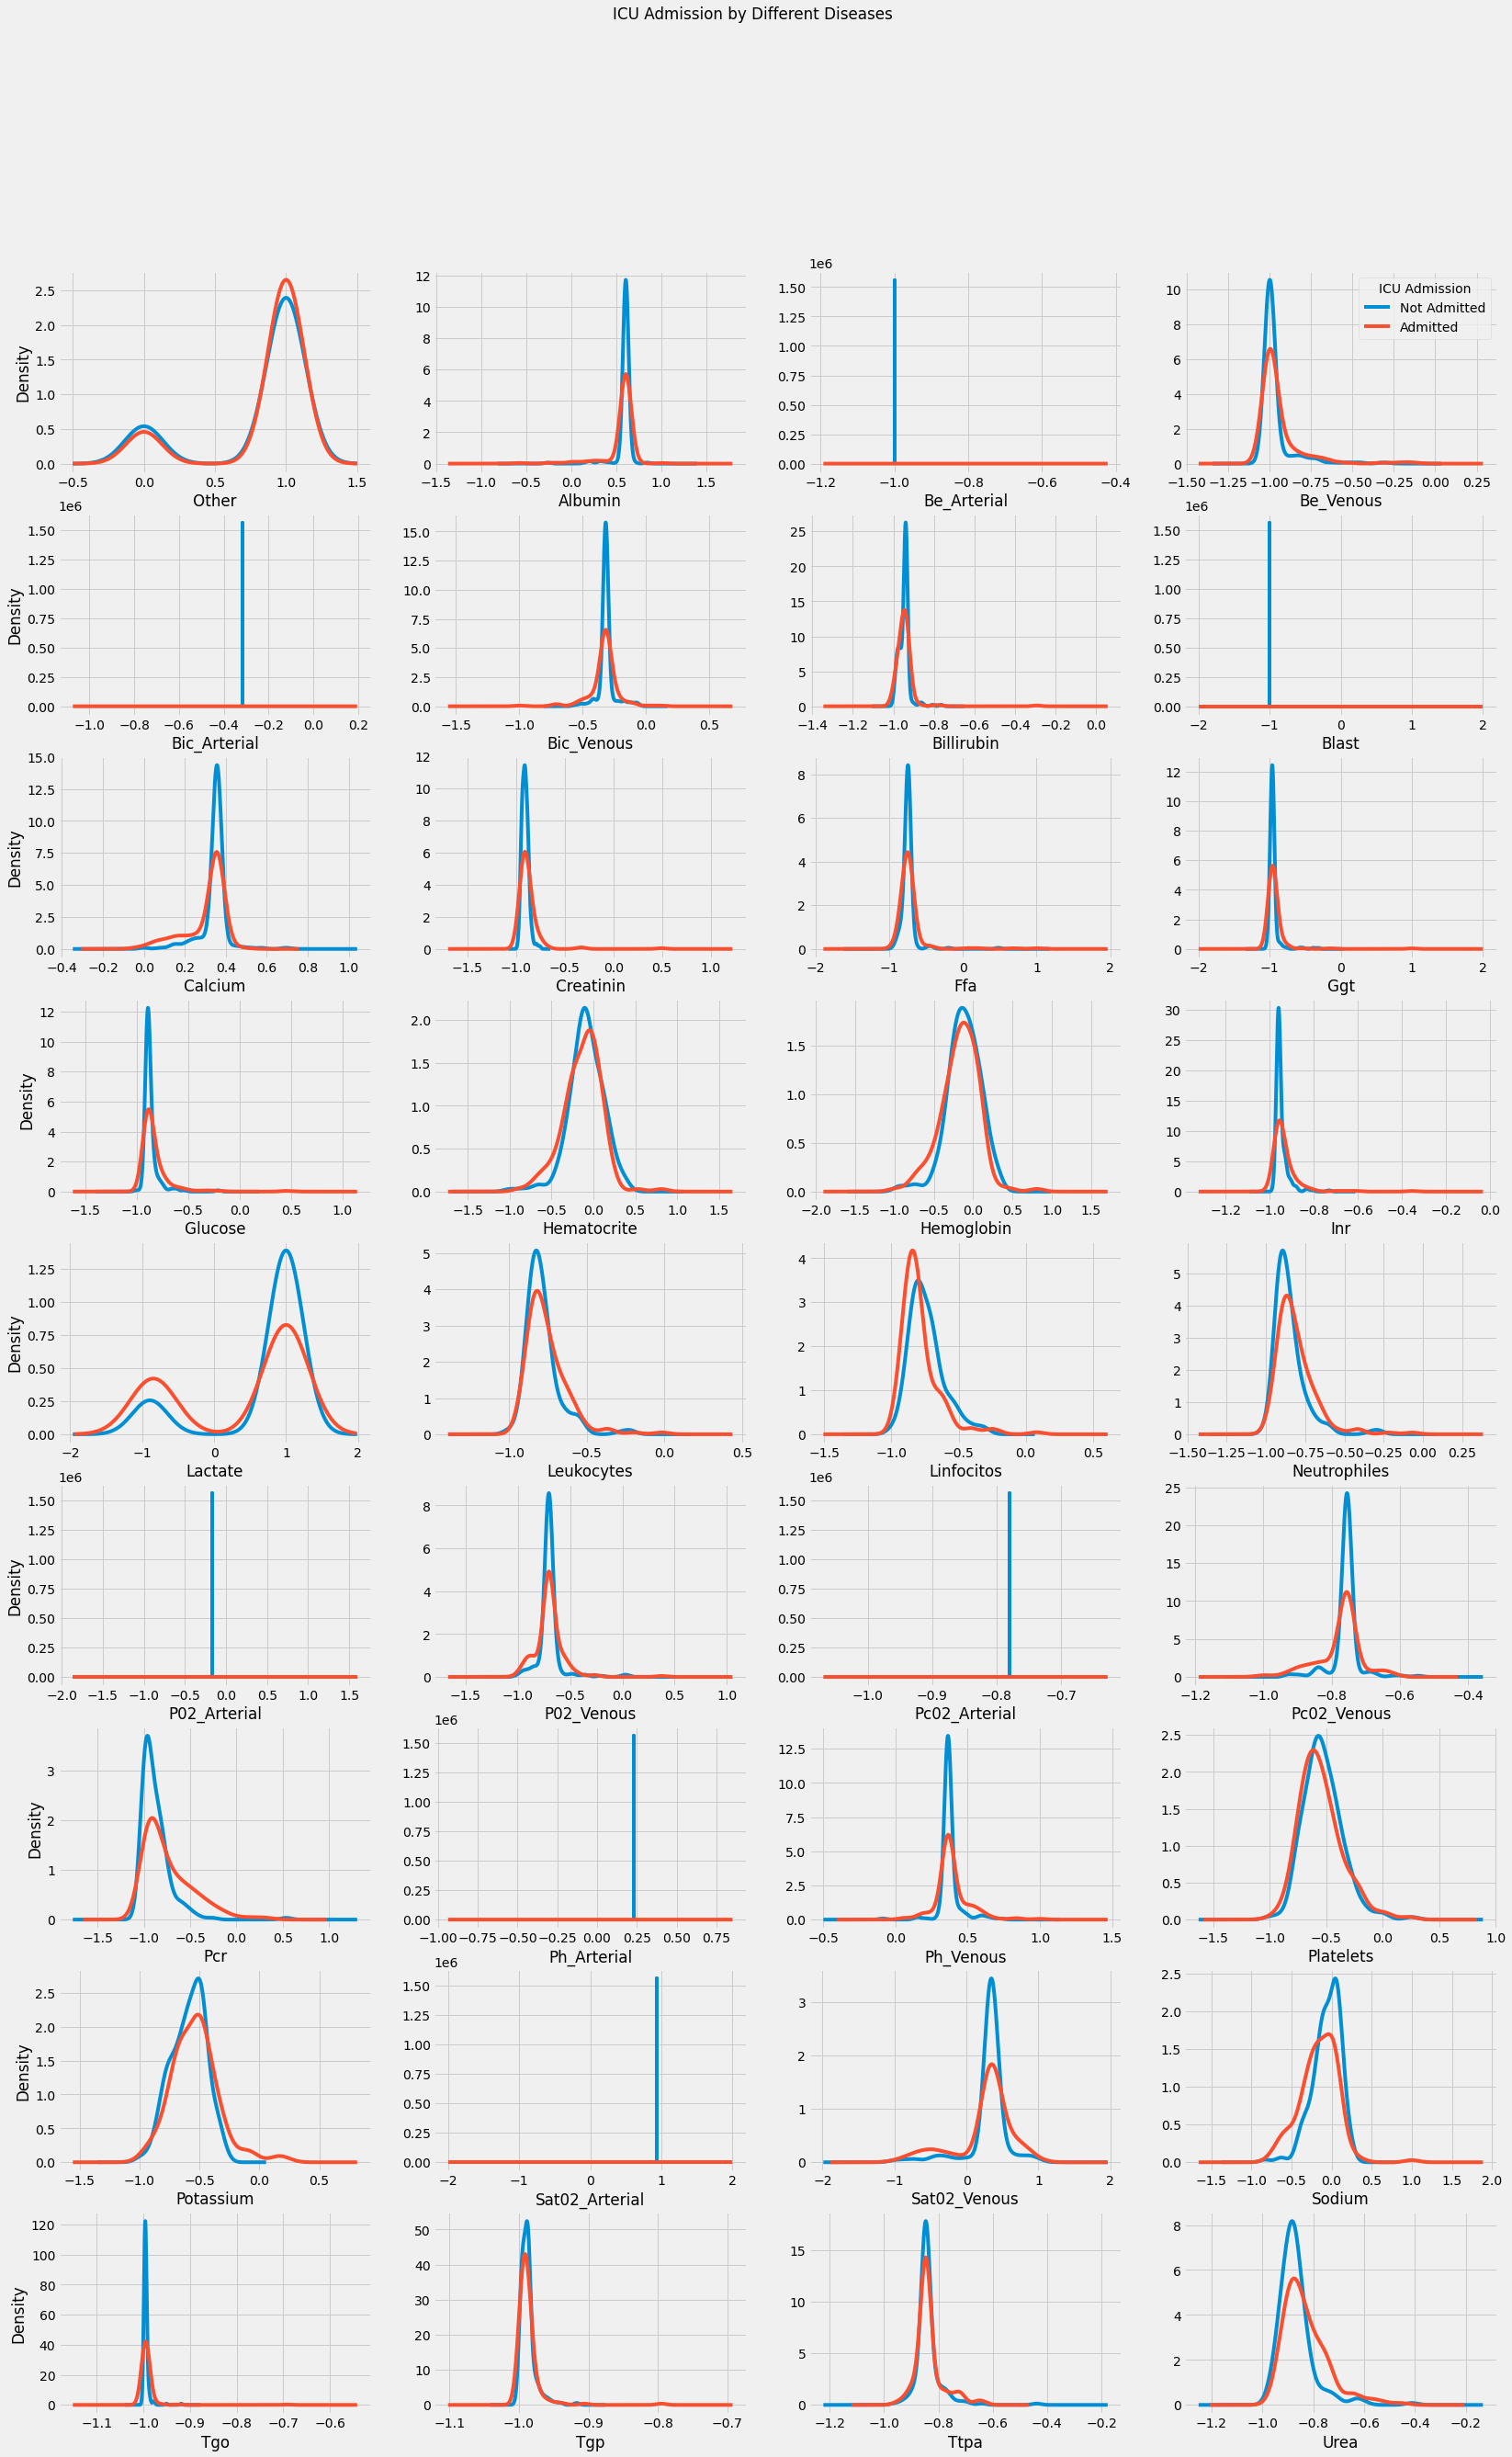

In [63]:
size_i, size_j = 9, 4
fig, axes = plt.subplots(size_i, size_j, sharex=False, figsize=(25,40))
i, j = 0, 0
for step, col in enumerate(data.iloc[:, 5:41].columns):
    i, j = step//size_j, step%size_j
    for k in range(2):
        col_icu = data[data["ICU"] == k][col].copy()
        col_icu.iloc[0] += 0.00001 # For situations when all of them have the same value
        col_icu.plot.density(ax=axes[i, j])
    axes[i, j].set_xlabel(col.title());
    axes[i, j].set_ylabel(None if j != 0 else "Density")
axes[0, j].legend(title = 'ICU Admission',labels=['Not Admitted', 'Admitted'])
fig.suptitle('ICU Admission by Different Diseases');

**Intuition: for some features like Tgo, we give more prob. to ICU=1 around -1, but less for values close to -1**

## PCA

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.

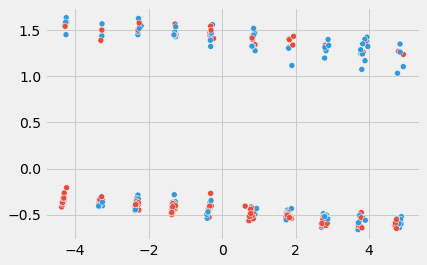

In [68]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data.drop(columns=['ICU']))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], c=data['ICU'].replace([0, 1], ['#e74c3c', '#3498db']));

## TSNE

t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.

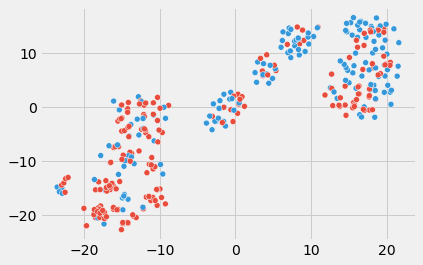

In [67]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(data.drop(columns=['ICU']))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], c=data['ICU'].replace([0, 1], ['#e74c3c', '#3498db']));

## Normalizing Data

At first I didn't normalize the data and train the models. But then, I normalized the data using different approaches and min-max normalization was better than the others in some cases. So finally I decided to continue with this normalization.
Two famous approaches:
- **Min-max normalization:** Guarantees all features will have the exact same scale but does not handle outliers well.
- **Z-score normalization:** Handles outliers, but does not produce normalized data with the exact same scale.

If we take a look at the data we notice that no outlier exists in each feature. So we choose Min-max

In [69]:
continues_cols = data.columns[data.nunique() > 2]
data[continues_cols] = (data[continues_cols] - data[continues_cols].min())/(data[continues_cols].max() - data[continues_cols].min())
data

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN,BE_ARTERIAL,BE_VENOUS,BIC_ARTERIAL,BIC_VENOUS,BILLIRUBIN,BLAST,CALCIUM,CREATININ,FFA,GGT,GLUCOSE,HEMATOCRITE,HEMOGLOBIN,INR,LACTATE,LEUKOCYTES,LINFOCITOS,NEUTROPHILES,P02_ARTERIAL,P02_VENOUS,PC02_ARTERIAL,PC02_VENOUS,PCR,PH_ARTERIAL,PH_VENOUS,PLATELETS,POTASSIUM,SAT02_ARTERIAL,SAT02_VENOUS,SODIUM,TGO,TGP,TTPA,UREA,DIMER,BLOODPRESSURE_DIASTOLIC_MEAN,RESPIRATORY_RATE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,ICU,motor neurone disease,heart disease,smoker,asthma,lung cancer,kidney disease
0,1,0.555556,0,0.0,0.0,1.0,0.75,0.0,0.000000,0.692308,0.608696,0.079602,0.0,0.305556,0.072324,0.096239,0.026316,0.074359,0.601852,0.614865,0.105058,1.000000,0.167587,0.078695,0.141136,0.478873,0.215517,0.8125,0.540541,0.081261,0.809524,0.416667,0.365180,0.393939,0.969697,0.672840,0.43750,0.009146,0.042831,0.260417,0.241379,0.002544,0.447761,0.250000,0.447761,0.333333,0.305263,0.192308,0.163265,0.868421,0.000000,0.000000,0.000000,0.000,0.00000,0.000000,0.000000,1,1,0,1,0,0,0
1,0,0.000000,0,0.0,0.0,1.0,0.75,0.0,0.000000,0.692308,0.608696,0.079602,0.0,0.541667,0.042430,0.096239,0.019591,0.151282,0.631944,0.641892,0.062257,1.000000,0.630126,0.084453,0.631239,0.478873,0.215517,0.8125,0.540541,0.039153,0.809524,0.416667,0.477707,0.242424,0.969697,0.672840,0.50000,0.014939,0.063315,0.220238,0.241379,0.010986,0.099502,0.142857,0.283582,0.308333,0.610526,0.230769,0.530612,1.000000,0.400000,0.330435,0.342105,0.250,0.00000,0.166667,0.545113,1,0,0,0,0,0,0
2,0,0.333333,1,0.0,1.0,1.0,0.20,0.0,0.000000,0.692308,0.608696,0.031343,0.0,0.500000,0.003857,0.380531,0.340936,0.074359,0.439815,0.432432,0.062257,0.074632,0.276420,0.151631,0.231497,0.478873,0.267241,0.8125,0.486486,0.323319,0.809524,0.416667,0.346072,0.181818,0.969697,0.790123,0.56250,0.034146,0.210428,0.220238,0.060345,0.010986,0.402985,0.321429,0.402985,0.258333,0.168421,0.269231,0.163265,0.842105,0.000000,0.000000,0.000000,0.000,0.00000,0.000000,0.000000,0,0,0,0,0,0,0
3,0,0.000000,0,0.0,0.0,1.0,0.75,0.0,0.000000,0.692308,0.608696,0.085075,0.0,0.541667,0.041466,0.050885,0.029825,0.102564,0.750000,0.722973,0.062257,1.000000,0.304022,0.332054,0.201377,0.478873,0.215517,0.8125,0.540541,0.005910,0.809524,0.416667,0.430998,0.333333,0.969697,0.672840,0.53125,0.004878,0.040968,0.220238,0.120690,0.000000,0.597015,0.214286,0.597015,0.416667,0.578947,0.230769,0.510204,0.947368,0.000000,0.086957,0.065789,0.125,0.06250,0.083333,0.093068,0,0,0,0,0,0,0
4,0,0.000000,0,0.0,0.0,1.0,0.75,0.0,0.000000,0.692308,0.608696,0.079602,0.0,0.541667,0.056895,0.096239,0.019591,0.074359,0.712963,0.689189,0.062257,1.000000,0.299685,0.610365,0.165232,0.478873,0.215517,0.8125,0.540541,0.001477,0.809524,0.416667,0.562633,0.272727,0.969697,0.672840,0.50000,0.006707,0.052142,0.220238,0.155172,0.000000,0.373134,0.285714,0.447761,0.250000,0.168421,0.230769,0.224490,0.921053,0.153846,0.173913,0.013158,0.000,0.03125,0.083333,0.029128,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,0,0.333333,1,0.0,1.0,1.0,0.00,0.0,0.000000,0.692308,0.608696,1.000000,0.0,0.500000,0.025072,1.000000,0.425731,0.120513,0.412037,0.445946,0.299611,1.000000,0.301656,0.111324,0.269793,0.478873,0.215517,0.8125,0.540541,0.282689,0.809524,0.416667,0.082803,0.303030,0.969697,0.672840,0.21875,0.242683,0.089385,0.635417,0.198276,0.010986,0.298507,0.321429,0.298507,0.083333,0.652632,0.269231,0.408163,0.868421,0.000000,0.000000,0.000000,0.000,0.00000,0.000000,0.000000,1,0,0,0,0,0,0
349,1,1.000000,0,0.0,1.0,1.0,0.75,0.0,0.000000,0.692308,0

## PCA (After Normalization) 

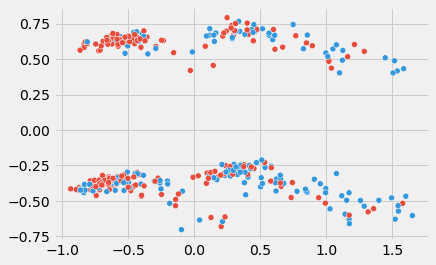

In [72]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data.drop(columns=['ICU']))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], c=data['ICU'].replace([0, 1], ['#e74c3c', '#3498db']));

## TSNE (After Normalization)

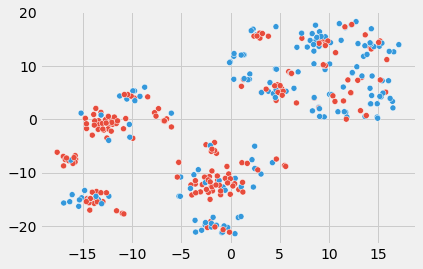

In [76]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(data.drop(columns=['ICU']))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], c=data['ICU'].replace([0, 1], ['#e74c3c', '#3498db']));

## Final Dataset

In [77]:
data.shape

(353, 64)

In [78]:
data.head()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN,BE_ARTERIAL,BE_VENOUS,BIC_ARTERIAL,BIC_VENOUS,BILLIRUBIN,BLAST,CALCIUM,CREATININ,FFA,GGT,GLUCOSE,HEMATOCRITE,HEMOGLOBIN,INR,LACTATE,LEUKOCYTES,LINFOCITOS,NEUTROPHILES,P02_ARTERIAL,P02_VENOUS,PC02_ARTERIAL,PC02_VENOUS,PCR,PH_ARTERIAL,PH_VENOUS,PLATELETS,POTASSIUM,SAT02_ARTERIAL,SAT02_VENOUS,SODIUM,TGO,TGP,TTPA,UREA,DIMER,BLOODPRESSURE_DIASTOLIC_MEAN,RESPIRATORY_RATE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,HEART_RATE_DIFF_REL,ICU,motor neurone disease,heart disease,smoker,asthma,lung cancer,kidney disease
0,1,0.555556,0,0.0,0.0,1.0,0.75,0.0,0.0,0.692308,0.608696,0.079602,0.0,0.305556,0.072324,0.096239,0.026316,0.074359,0.601852,0.614865,0.105058,1.000000,0.167587,0.078695,0.141136,0.478873,0.215517,0.8125,0.540541,0.081261,0.809524,0.416667,0.365180,0.393939,0.969697,0.672840,0.43750,0.009146,0.042831,0.260417,0.241379,0.002544,0.447761,0.250000,0.447761,0.333333,0.305263,0.192308,0.163265,0.868421,0.000000,0.000000,0.000000,0.000,0.00000,0.000000,0.000000,1,1,0,1,0,0,0
1,0,0.000000,0,0.0,0.0,1.0,0.75,0.0,0.0,0.692308,0.608696,0.079602,0.0,0.541667,0.042430,0.096239,0.019591,0.151282,0.631944,0.641892,0.062257,1.000000,0.630126,0.084453,0.631239,0.478873,0.215517,0.8125,0.540541,0.039153,0.809524,0.416667,0.477707,0.242424,0.969697,0.672840,0.50000,0.014939,0.063315,0.220238,0.241379,0.010986,0.099502,0.142857,0.283582,0.308333,0.610526,0.230769,0.530612,1.000000,0.400000,0.330435,0.342105,0.250,0.00000,0.166667,0.545113,1,0,0,0,0,0,0
2,0,0.333333,1,0.0,1.0,1.0,0.20,0.0,0.0,0.692308,0.608696,0.031343,0.0,0.500000,0.003857,0.380531,0.340936,0.074359,0.439815,0.432432,0.062257,0.074632,0.276420,0.151631,0.231497,0.478873,0.267241,0.8125,0.486486,0.323319,0.809524,0.416667,0.346072,0.181818,0.969697,0.790123,0.56250,0.034146,0.210428,0.220238,0.060345,0.010986,0.402985,0.321429,0.402985,0.258333,0.168421,0.269231,0.163265,0.842105,0.000000,0.000000,0.000000,0.000,0.00000,0.000000,0.000000,0,0,0,0,0,0,0
3,0,0.000000,0,0.0,0.0,1.0,0.75,0.0,0.0,0.692308,0.608696,0.085075,0.0,0.541667,0.041466,0.050885,0.029825,0.102564,0.750000,0.722973,0.062257,1.000000,0.304022,0.332054,0.201377,0.478873,0.215517,0.8125,0.540541,0.005910,0.809524,0.416667,0.430998,0.333333,0.969697,0.672840,0.53125,0.004878,0.040968,0.220238,0.120690,0.000000,0.597015,0.214286,0.597015,0.416667,0.578947,0.230769,0.510204,0.947368,0.000000,0.086957,0.065789,0.125,0.06250,0.083333,0.093068,0,0,0,0,0,0,0
4,0,0.000000,0,0.0,0.0,1.0,0.75,0.0,0.0,0.692308,0.608696,0.079602,0.0,0.541667,0.056895,0.096239,0.019591,0.074359,0.712963,0.689189,0.062257,1.000000,0.299685,0.610365,0.165232,0.478873,0.215517,0.8125,0.540541,0.001477,0.809524,0.416667,0.562633,0.272727,0.969697,0.672840,0.50000,0.006707,0.052142,0.220238,0.155172,0.000000,0.373134,0.285714,0.447761,0.250000,0.168421,0.230769,0.224490,0.921053,0.153846,0.173913,0.013158,0.000,0.03125,0.083333,0.029128,0,0,0,0,0,0,0


**So finally we got 64 useful features out of 227 and we are good to go for training different models**

although, there are still some columns that we can drop ... But, we will skip this for now (Future work in this area could be playing around with the high correlated features that we've seen earlier  but didn't remove, or some features that seem a bit useless, like "OTHER" & etc.)

# Models

## Splitting data to Test & Train set

In [96]:
y = data['ICU']
X = data.drop(columns=['ICU'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=0)

- ## Logistic Regression

In [129]:
parameters = {
    'penalty': ['l2', 'none'],
    'solver': ['newton-cg', 'sag'],
    'max_iter': [10000]
}
grid_search_cv = GridSearchCV(LogisticRegression(), parameters, scoring='f1')
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_params_

{'max_iter': 10000, 'penalty': 'l2', 'solver': 'newton-cg'}

In [130]:
lr = LogisticRegression(max_iter=10000, penalty='l2', solver='newton-cg')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
pd.DataFrame(data=classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.666667,0.800000,0.727273,45.000000
1,0.742857,0.590909,0.658228,44.000000
accuracy,0.696629,0.696629,0.696629,0.696629
macro avg,0.704762,0.695455,0.692750,89.000000
weighted avg,0.704334,0.696629,0.693138,89.000000


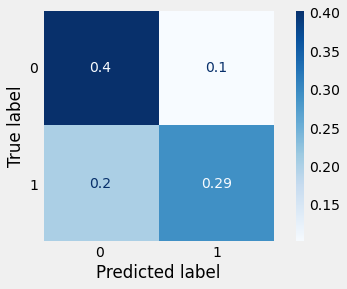

In [131]:
plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues, normalize='all')
plt.grid(False)

- ## SVM

In [136]:
param_grid = {
    'C': [0.01, 1, 5, 10, 20],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [i for i in range(1, 4)],
    'gamma': ['scale', 'auto'],
    'probability': [True, False]
}

grid_search_cv = GridSearchCV(SVC(), param_grid, scoring='f1', cv=10)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_params_

{'C': 10, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True}

In [139]:
SVM = SVC(C=10, degree=1, gamma='auto', kernel='rbf', probability=True)
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
pd.DataFrame(data=classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.672727,0.822222,0.740000,45.000000
1,0.764706,0.590909,0.666667,44.000000
accuracy,0.707865,0.707865,0.707865,0.707865
macro avg,0.718717,0.706566,0.703333,89.000000
weighted avg,0.718200,0.707865,0.703745,89.000000


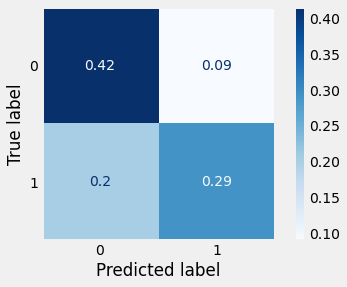

In [140]:
plot_confusion_matrix(SVM, X_test, y_test, cmap=plt.cm.Blues, normalize='all')
plt.grid(False)

- ## Gaussian Naive Bayes

In [143]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_pred = gaussian_nb.predict(X_test)
pd.DataFrame(data=classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.523810,0.977778,0.682171,45.000000
1,0.800000,0.090909,0.163265,44.000000
accuracy,0.539326,0.539326,0.539326,0.539326
macro avg,0.661905,0.534343,0.422718,89.000000
weighted avg,0.660353,0.539326,0.425633,89.000000


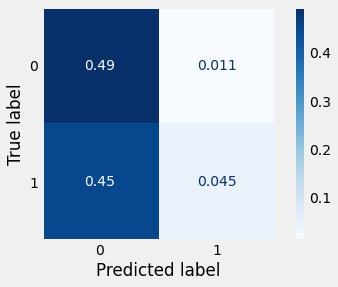

In [144]:
plot_confusion_matrix(gaussian_nb, X_test, y_test, cmap=plt.cm.Blues, normalize='all')
plt.grid(False)

- ## Bernoulli Naive Bayes

In [145]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1, 5, 10, 20],
    'fit_prior': [False, True]
}

grid_search_cv = GridSearchCV(BernoulliNB(), param_grid, scoring='f1', cv=10)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_params_

{'alpha': 0.5, 'fit_prior': False}

In [146]:
bernoulli_nb = BernoulliNB(alpha=0.5, fit_prior=False)
bernoulli_nb.fit(X_train, y_train)
y_pred = bernoulli_nb.predict(X_test)
pd.DataFrame(data=classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.673469,0.733333,0.702128,45.000000
1,0.700000,0.636364,0.666667,44.000000
accuracy,0.685393,0.685393,0.685393,0.685393
macro avg,0.686735,0.684848,0.684397,89.000000
weighted avg,0.686586,0.685393,0.684596,89.000000


- ## Neural Network

In [147]:
param_grid = {
    'hidden_layer_sizes': [5, 20, 50],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'max_iter': [3500]
}

grid_search_cv = GridSearchCV(MLPClassifier(), param_grid, scoring='f1', cv=10)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_params_

{'activation': 'logistic',
 'alpha': 0.0001,
 'hidden_layer_sizes': 20,
 'max_iter': 3500,
 'solver': 'adam'}

In [148]:
nn = MLPClassifier(activation='logistic', alpha=0.0001, hidden_layer_sizes=20, max_iter=3500, solver='adam')
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)
pd.DataFrame(data=classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.678571,0.844444,0.752475,45.000000
1,0.787879,0.590909,0.675325,44.000000
accuracy,0.719101,0.719101,0.719101,0.719101
macro avg,0.733225,0.717677,0.713900,89.000000
weighted avg,0.732611,0.719101,0.714333,89.000000


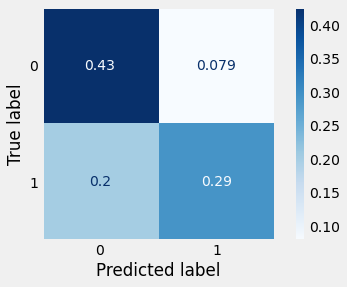

In [149]:
plot_confusion_matrix(nn, X_test, y_test, cmap=plt.cm.Blues, normalize='all')
plt.grid(False)

- ## KNN

In [158]:
param_grid = {
    'n_neighbors': [5, 10, 15, 20, 25, 30],
}

grid_search_cv = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='f1', cv=10)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_params_

{'n_neighbors': 15}

In [160]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
pd.DataFrame(data=classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.548387,0.755556,0.635514,45.000000
1,0.592593,0.363636,0.450704,44.000000
accuracy,0.561798,0.561798,0.561798,0.561798
macro avg,0.570490,0.559596,0.543109,89.000000
weighted avg,0.570241,0.561798,0.544147,89.000000


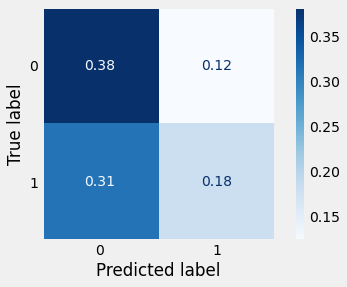

In [161]:
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues, normalize='all')
plt.grid(False)

- ## Random Forest

In [98]:
param_grid = {
    'n_estimators': [25, 50, 100, 200, 300, 400], 
    'criterion': ['entropy', 'gini'],
    'max_depth': [1, 2, 5, 8, 12, 14, 18],
    'max_features':['sqrt', 'log2', 'auto'],
    'bootstrap': [True, False],
    'oob_score': [False],
    'random_state': [0]
}
grid_search_cv = GridSearchCV(RandomForestClassifier(), param_grid, scoring='f1', cv=2)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 18,
 'max_features': 'log2',
 'n_estimators': 25,
 'oob_score': False,
 'random_state': 0}

In [167]:
rfc = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=18, max_features='log2', n_estimators=400, oob_score=False, random_state=0)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
pd.DataFrame(data=classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.780000,0.866667,0.821053,45.000000
1,0.846154,0.750000,0.795181,44.000000
accuracy,0.808989,0.808989,0.808989,0.808989
macro avg,0.813077,0.808333,0.808117,89.000000
weighted avg,0.812705,0.808989,0.808262,89.000000


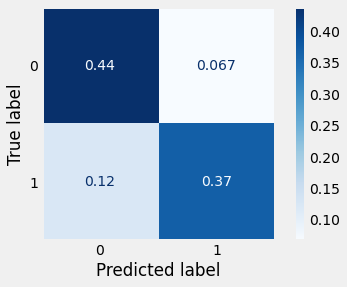

In [163]:
plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues, normalize='all')
plt.grid(False)

## Compare different models

**As mentioned in project documentation we concider f1 score for our first evaluation metric. based on that we choose "Random Forest" for our final classifier**

- ### Comparing ROC

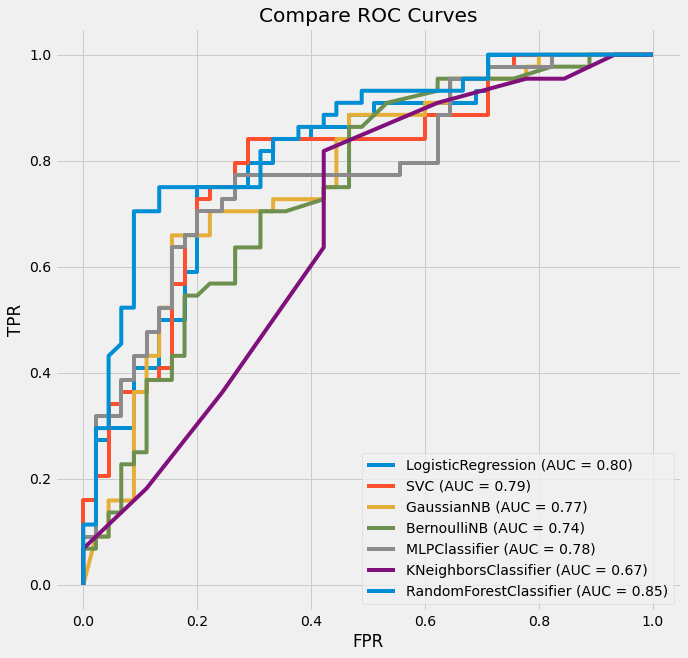

In [168]:
plt.figure(figsize=(10, 10))
ax = plt.gca()
for model in [lr, SVM, gaussian_nb, bernoulli_nb, nn, knn, rfc]:
    plot_roc_curve(model, X_test, y_test, ax=ax)
ax.set_ylabel('TPR')
ax.set_xlabel('FPR')
ax.set_title('Compare ROC Curves');

In [169]:
pd.DataFrame({
    'Classifier': ["Linear Regression", "SVM", "Gaussian Naive Bayes", "Bernoulli Naive Bayes", "Neural Network", "KNN", "Random Forest"],
    'F1 Score': [f1_score(model.predict(X_test), y_test) for model in [lr, SVM, gaussian_nb, bernoulli_nb, nn, knn, rfc]]
}).set_index("Classifier")

,F1 Score
Classifier,
Linear Regression,0.658228
SVM,0.666667
Gaussian Naive Bayes,0.163265
Bernoulli Naive Bayes,0.666667
Neural Network,0.675325
KNN,0.450704
Random Forest,0.795181


As you can see, Random forest is way better than the others. Besides, in terms of complexity, it's much simpler than some others. So we will continue with this classifier.

# Final Model $\rightarrow$ Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean/average prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set. Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees. However, data characteristics can affect their performance.

The way it acts: shortly it's majority opinion of some decision trees. different decision trees are trained and finaly in test time for a new sample, all of the trees predict the value and at top we do the majority vote and predict the final class.

We can see a simple example of this approach below 

<div align="center"><img src="images/Random_Forest.jpeg" /></div>

In [172]:
rfc = RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=18, max_features='log2', n_estimators=400, oob_score=False, random_state=0)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

## Some evaluations

- ### Classification Report

In [173]:
pd.DataFrame(data=classification_report(y_test, y_pred, output_dict=True)).T

,precision,recall,f1-score,support
0,0.780000,0.866667,0.821053,45.000000
1,0.846154,0.750000,0.795181,44.000000
accuracy,0.808989,0.808989,0.808989,0.808989
macro avg,0.813077,0.808333,0.808117,89.000000
weighted avg,0.812705,0.808989,0.808262,89.000000


- ### Confusion Matrix

In [174]:
print(confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test, y_pred, normalize='all'))

[[39  6]
 [11 33]]
[[0.43820225 0.06741573]
 [0.12359551 0.37078652]]


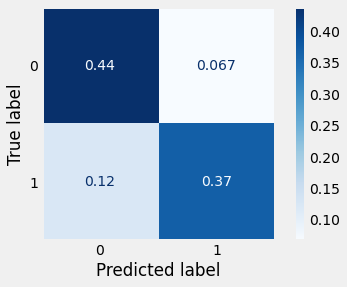

In [175]:
plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues, normalize='all')
plt.grid(False)

- ### ROC

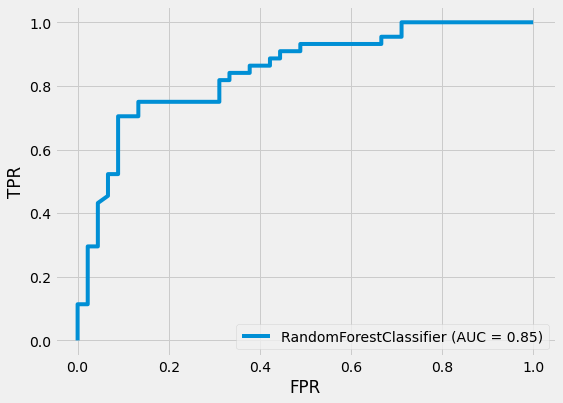

In [176]:
plt.figure(figsize=(8, 6))
ax = plt.gca()
plot_roc_curve(rfc, X_test, y_test, ax=ax);
ax.set_ylabel('TPR')
ax.set_xlabel('FPR');

## Feature importance

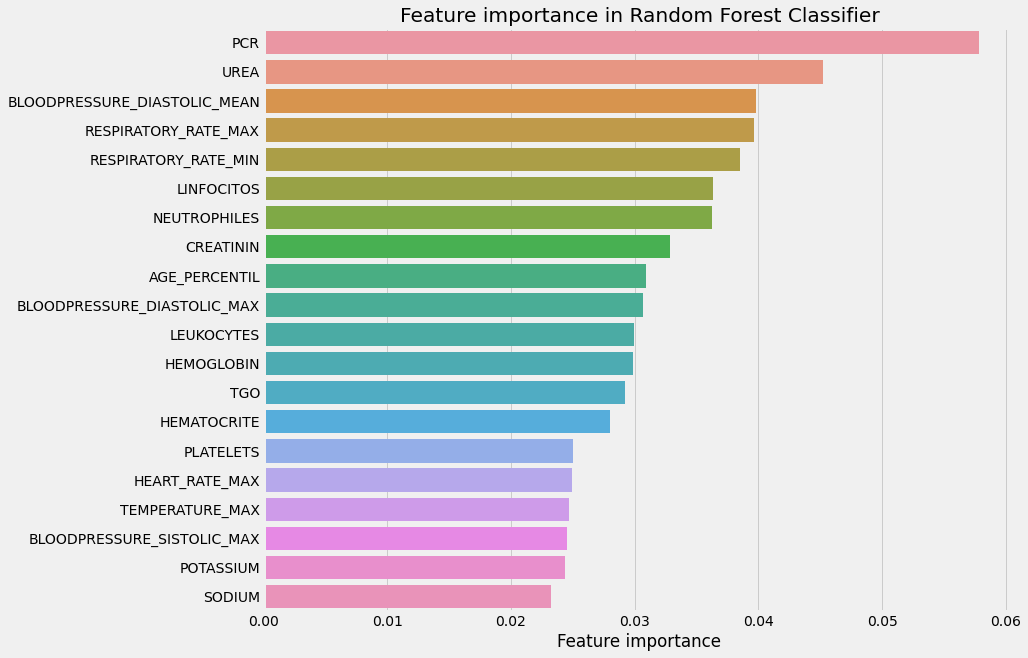

In [177]:
feature_importance_df = pd.DataFrame({'feature_importance': rfc.feature_importances_, 'variable': X_train.columns})
plt.figure(figsize=(12, 10))
sns.barplot(data=feature_importance_df.sort_values('feature_importance', ascending=False)[:20], y='variable', x='feature_importance')
plt.title('Feature importance in Random Forest Classifier')
plt.xlabel('Feature importance')
plt.ylabel(None);

Based on my knowledge I expected to see PCR at top ...

## Tree Explainer

Uses Tree SHAP algorithms to explain the output of ensemble tree models. Tree SHAP is a fast and exact method to estimate SHAP values for tree models and ensembles of trees, under several different possible assumptions about feature dependence.

Some notes on the plot: 
* Color: The value of the variable (in relation to the other variables of the same feature)
* Horizontal position: How much that variable impacted the model

- ### Not admitted to ICU

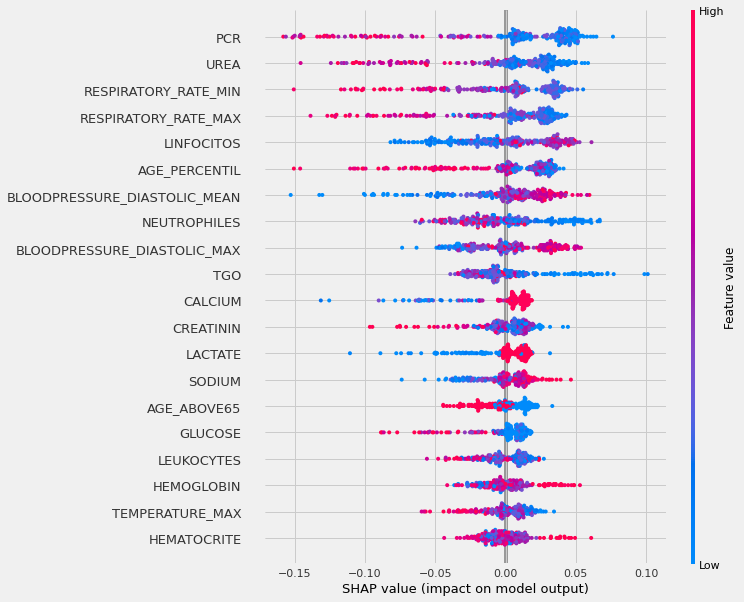

In [178]:
shap_values = shap.TreeExplainer(rfc).shap_values(X_train)
shap.summary_plot(shap_values[0], X_train)

- ### Admitted to ICU

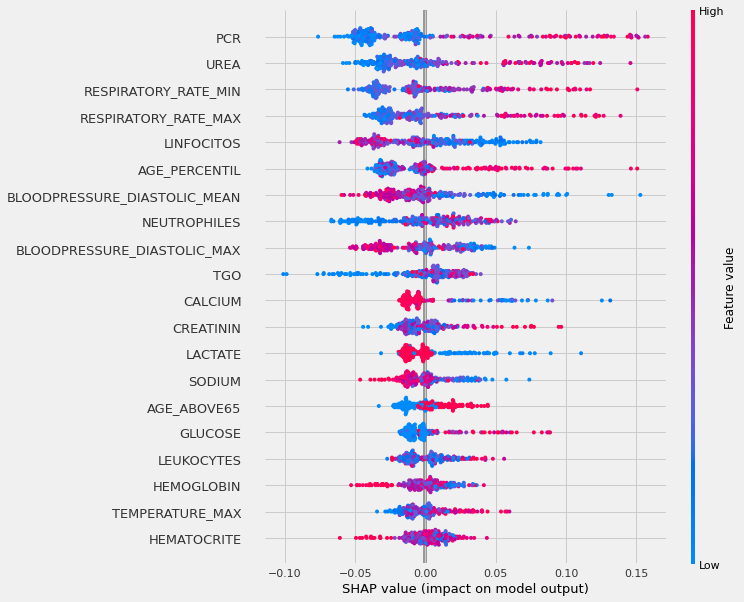

In [179]:
shap.summary_plot(shap_values[1], X_train)

# Resources

Note: Checked ones are the ones use by me. others are just for you if you were interested in reading more about the topics

<input type="checkbox" disabled /> [A 6 Step Field Guide for Building Machine Learning Projects](https://towardsdatascience.com/a-6-step-field-guide-for-building-machine-learning-projects-6e4554f6e3a1)

<input type="checkbox" disabled /> [Why EDA is necessary for Machine Learning?](https://medium.com/@srimalashish/why-eda-is-necessary-for-machine-learning-233b6e4d5083)

<input type="checkbox" disabled checked /> [An Extensive Step by Step Guide to Exploratory Data Analysis](https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e)

<input type="checkbox" disabled /> [Fundamental Techniques of Feature Engineering for Machine Learning](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114)

<input type="checkbox" disabled /> [Data Storytelling The Essential Data Science Skill Everyone Needs](https://www.forbes.com/sites/brentdykes/2016/03/31/data-storytelling-the-essential-data-science-skill-everyone-needs/?sh=258179552ad4)

<input type="checkbox" disabled checked /> [COVID-19 Clinical access and ICU Diagnosis](https://nbviewer.jupyter.org/github/AndreisSirlene/Bootcamp_datascience/blob/main/Final%20Project%20-%20ICU%20Prediction%20Sirio%20Libanes/SirleneAndreis-FinalProject.ipynb)

<input type="checkbox" disabled checked /> Documentation of different libraries such as `Sklearn`, `Shap`, ...